In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
original_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/data.xlsx')
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')

ravn_df = original_df[original_df['SiteId'] == 1][['Timestamp', 'TotalEntries']]
ravn_df.set_index('Timestamp', inplace=True)
ravn_df.sort_index(inplace=True)
marag_df = original_df[original_df['SiteId'] == 2][['Timestamp', 'TotalEntries']]
marag_df.set_index('Timestamp', inplace=True)
marag_df.sort_index(inplace=True)
jaume_df = original_df[original_df['SiteId'] == 3][['Timestamp', 'TotalEntries']]
jaume_df.set_index('Timestamp', inplace=True)
jaume_df.sort_index(inplace=True)

## Checking for continuity of all the time series

In [3]:
test_ravn = ravn_df.asfreq('30T')
pd.Series(test_ravn[test_ravn['TotalEntries'].isnull()].index).describe()

count     0
unique    0
Name: Timestamp, dtype: int64

In [4]:
test_marag = marag_df.asfreq('30T')
#test_marag[test_marag['TotalEntries'].isnull()].index
pd.Series(test_marag[test_marag['TotalEntries'].isnull()].index).describe()

count                     192
unique                    192
top       2017-01-05 23:30:00
freq                        1
first     2017-01-05 00:00:00
last      2017-01-08 23:30:00
Name: Timestamp, dtype: object

In [5]:
test_jaume = jaume_df.asfreq('30T')
#test_jaume[test_jaume['TotalEntries'].isnull()].index
pd.Series(test_jaume[test_jaume['TotalEntries'].isnull()].index).describe()

count                      96
unique                     96
top       2019-01-13 06:00:00
freq                        1
first     2019-01-12 00:00:00
last      2019-01-13 23:30:00
Name: Timestamp, dtype: object

### In maragall there's no data from 05.01.2017 00:00:00 to 08.01.2017 23:30:30

### In jaume I there's no data from 12.01.2019 00:00:00 to 13.01.2019 23:30:00

In [6]:
pd.Series(jaume_df['TotalEntries'].index).describe()

count                    3552
unique                   3552
top       2019-01-05 06:30:00
freq                        1
first     2018-12-11 00:00:00
last      2019-02-24 23:30:00
Name: Timestamp, dtype: object

In [7]:
original_df['SiteId'].unique()

array([2, 1, 3])

In [8]:
analysis_df = pd.concat([ravn_df, marag_df, jaume_df], axis=1)
analysis_df.columns = ['ravn_antic', 'marag', 'jaume_I']
analysis_df.describe()

,ravn_antic,marag,jaume_I
count,4320.000000,37344.000000,3552.000000
mean,449.775694,152.912409,83.925113
std,462.897788,128.908313,79.703838
min,0.000000,0.000000,0.000000
25%,70.000000,36.000000,8.000000
50%,276.000000,135.000000,82.000000
75%,753.000000,241.000000,121.000000
max,2082.000000,1525.000000,456.000000


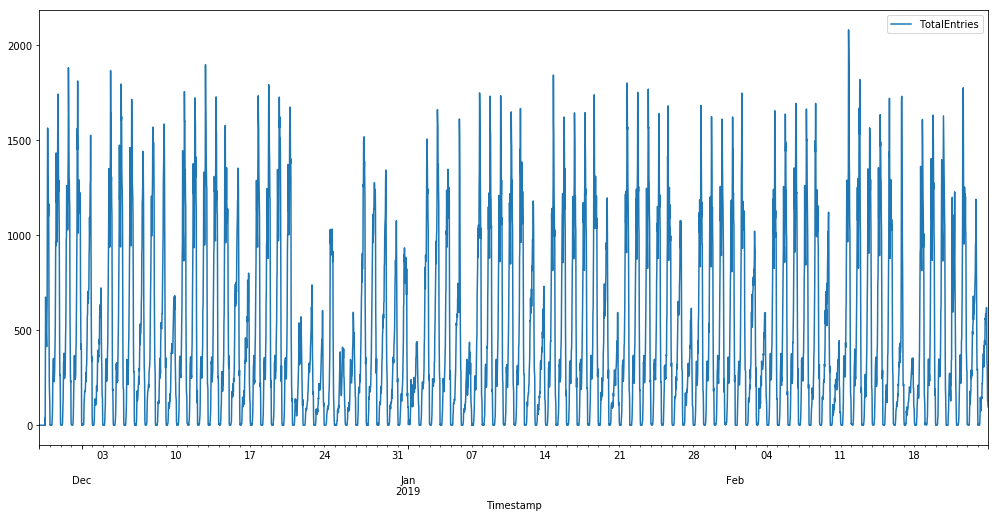

In [9]:
#Casc_antic. 30' traffic
#plt.plot(cat_df)
ravn_df.plot(figsize=(17,8))

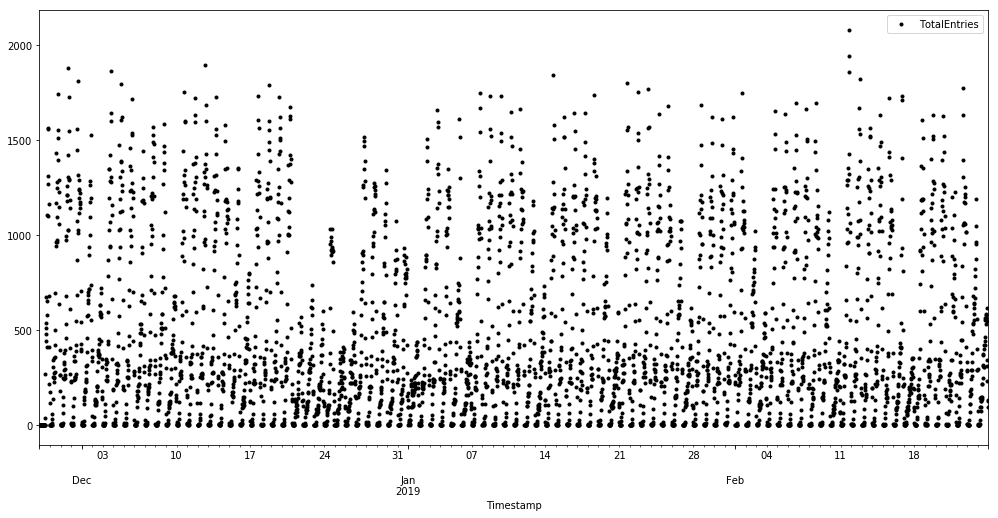

In [10]:
#casc_antic. 30' dot
ravn_df.plot(style='k.', figsize=(17,8))

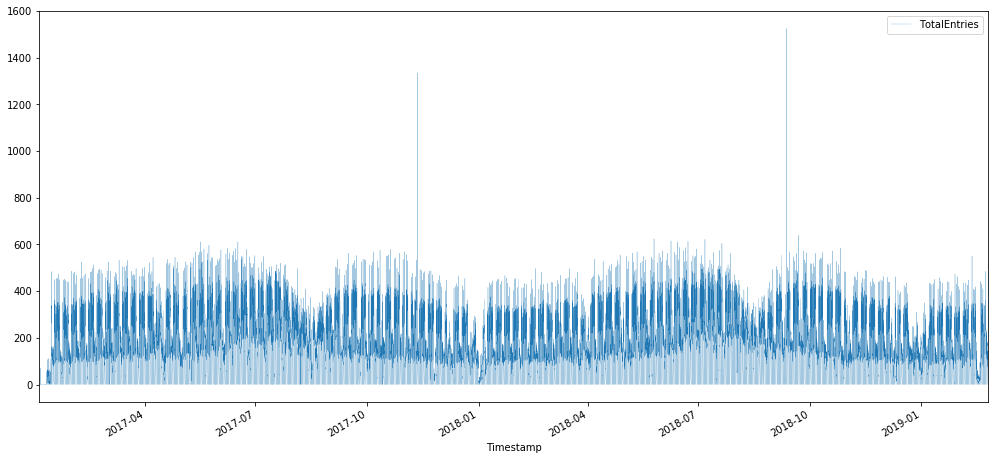

In [11]:
#Maragall 30' traffic
#plt.rcParams['lines.linewidth'] = 0.2
#plt.plot(Maragall_df)
marag_df.plot(figsize=(17,8), linewidth=0.2)

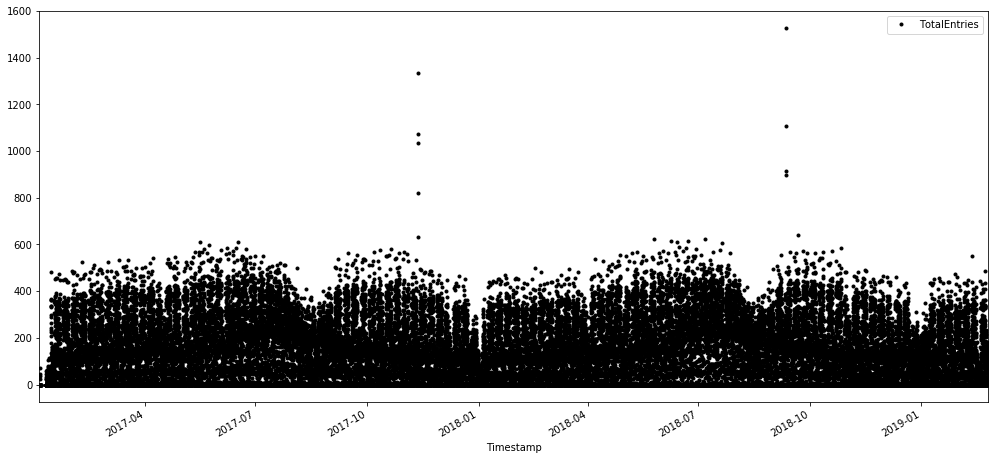

In [12]:
#The marag_df dataset is too dense, let's try some other styles:
marag_df.plot(style='k.', figsize=(17, 8))
#marag_df.plot(kind='scatter', x=marag_df.index, y=marag_df, figsize=(17,8))

In [13]:
marag_df.sort_values(by='TotalEntries', ascending=False).head(20)

,TotalEntries
Timestamp,
2018-09-11 18:00:00,1525
2017-11-11 19:00:00,1335
2018-09-11 17:30:00,1108
2017-11-11 18:30:00,1075
2017-11-11 19:30:00,1033
2018-09-11 19:00:00,914
2018-09-11 18:30:00,898
2017-11-11 20:00:00,822
2018-09-21 15:00:00,639


In [14]:
cy_groups = marag_df.groupby(pd.Grouper(freq= 'A'))

marag_years = pd.DataFrame
for k, p in cy_groups:
    tempdf = cy_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.year[:1][0])]    
    tempdf['time'] = tempdf.index.strftime('%m-%d-%H-%M')
    if marag_years.empty:
        marag_years = tempdf
    else:
        marag_years = pd.merge(marag_years, tempdf, how='outer', on='time')

marag_years.sort_values('time', inplace=True)
#marag_years.drop('time', axis=1, inplace=True)
marag_years.set_index(marag_years['time'], inplace=True, drop=True)

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a69b20048>,
      dtype=object)

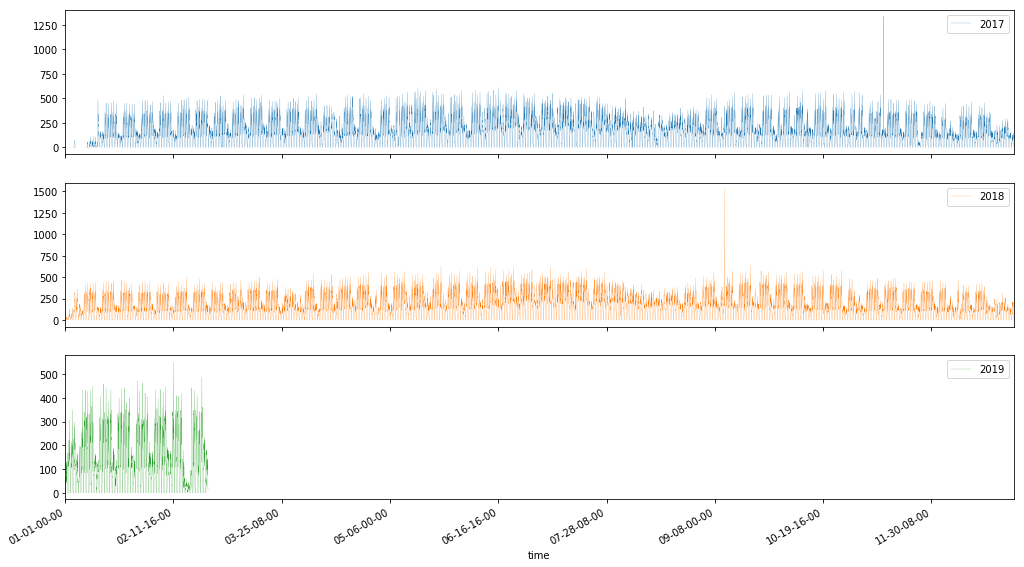

In [15]:
marag_years.plot(subplots=True, legend=True, figsize=(17,10), linewidth=0.2)

In [16]:
#Maragall grouping by day each year:
marag_df[marag_df.index.year == 2017].groupby(pd.Grouper(freq= 'D')).sum().head()

,TotalEntries
Timestamp,
2017-01-04,177
2017-01-05,0
2017-01-06,0
2017-01-07,0
2017-01-08,0


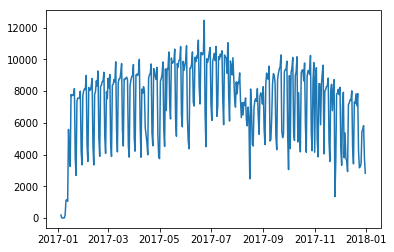

In [17]:
plt.plot(marag_df[marag_df.index.year == 2017].groupby(pd.Grouper(freq= 'D')).sum())

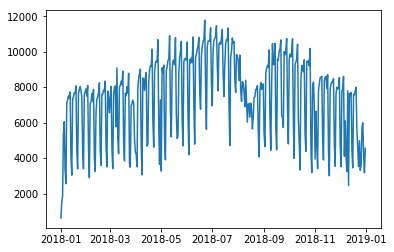

In [18]:
plt.plot(marag_df[marag_df.index.year == 2018].groupby(pd.Grouper(freq= 'D')).sum())

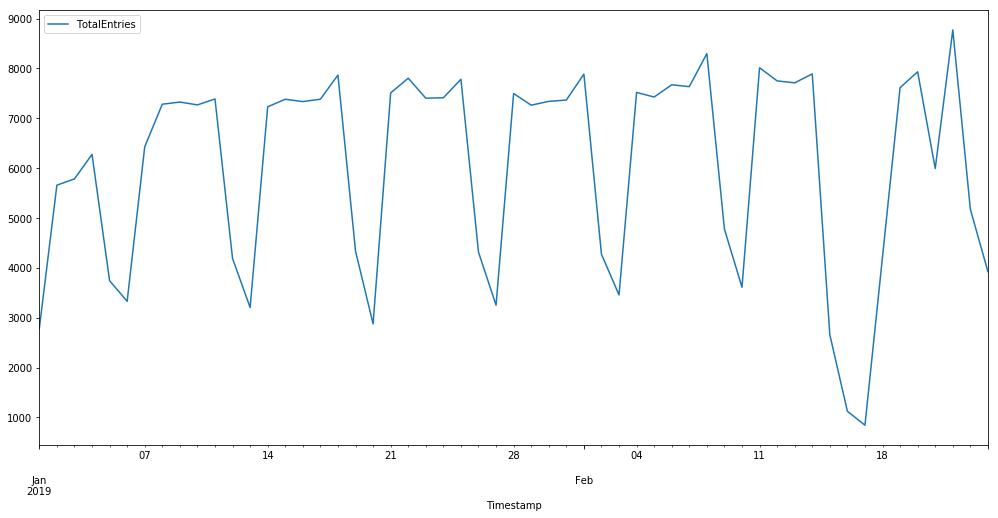

In [19]:
(marag_df[marag_df.index.year == 2019].groupby(pd.Grouper(freq= 'D')).sum()).plot(figsize=(17,8))

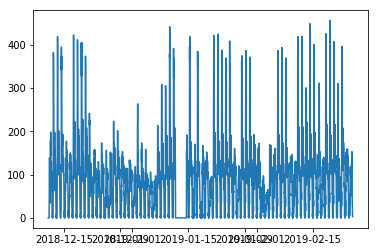

In [20]:
plt.plot(jaume_df)

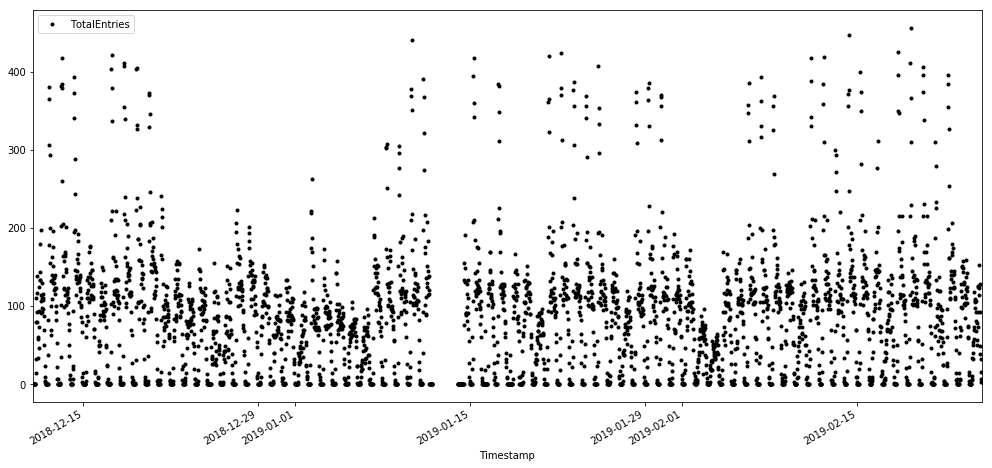

In [21]:
#jaume I. 30' dot
jaume_df.plot(style='k.', figsize=(17,8))

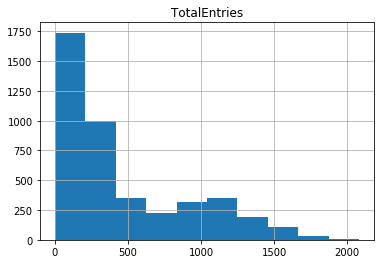

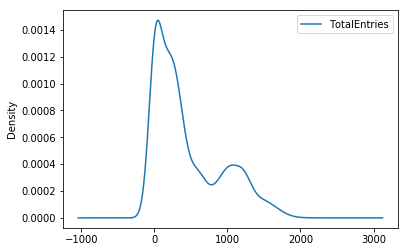

In [22]:
ravn_df.hist()
ravn_df.plot(kind='kde')

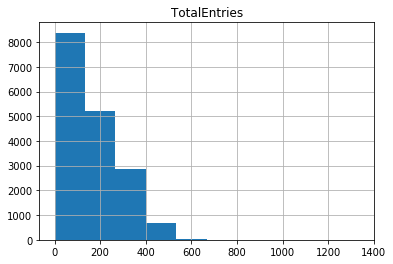

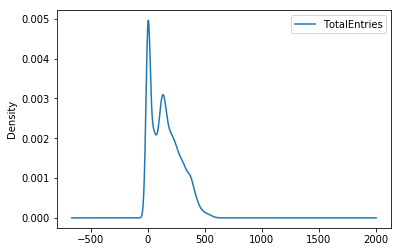

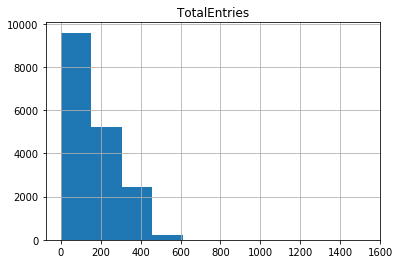

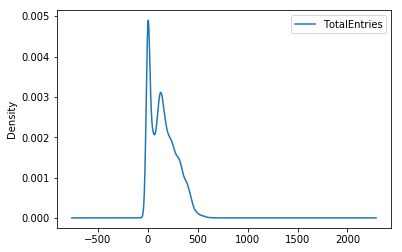

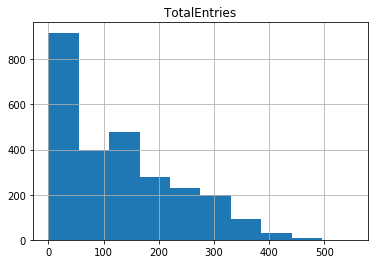

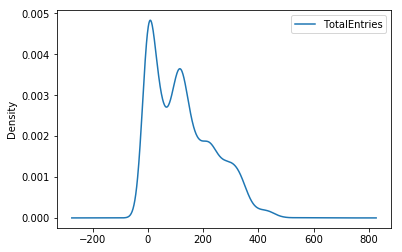

In [23]:
marag_df[marag_df.index.year == 2017].hist()
marag_df[marag_df.index.year == 2017].plot(kind='kde')
marag_df[marag_df.index.year == 2018].hist()
marag_df[marag_df.index.year == 2018].plot(kind='kde')
marag_df[marag_df.index.year == 2019].hist()
marag_df[marag_df.index.year == 2019].plot(kind='kde')

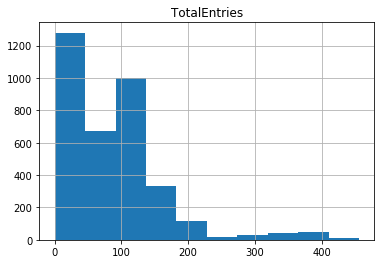

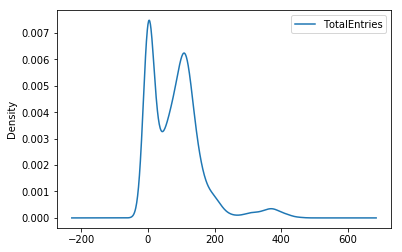

In [24]:
jaume_df.hist()
jaume_df.plot(kind='kde')

In [25]:
cam_groups = ravn_df.groupby(pd.Grouper(freq= 'M'))
ravn_months = pd.concat([pd.DataFrame(x[1].values) for x in cam_groups], axis = 1)
ravn_months.columns = ['Nov', 'Dec', 'Jan', 'Feb']

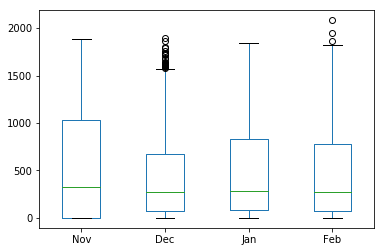

In [26]:
ravn_months.plot(kind='box')

In [15]:
m_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ma17m_groups = marag_df['2017'].groupby(pd.Grouper(freq= 'M'))
mam_17 = pd.concat([pd.DataFrame(x[1].values) for x in ma17m_groups], axis = 1)
mam_17.columns = m_names

ma18m_groups = marag_df['2018'].groupby(pd.Grouper(freq= 'M'))
mam_18 = pd.concat([pd.DataFrame(x[1].values) for x in ma18m_groups], axis = 1)
mam_18.columns = m_names

ma19m_groups = marag_df['2019'].groupby(pd.Grouper(freq= 'M'))
mam_19 = pd.concat([pd.DataFrame(x[1].values) for x in ma19m_groups], axis = 1)
mam_19.columns = ['Jan', 'Feb']


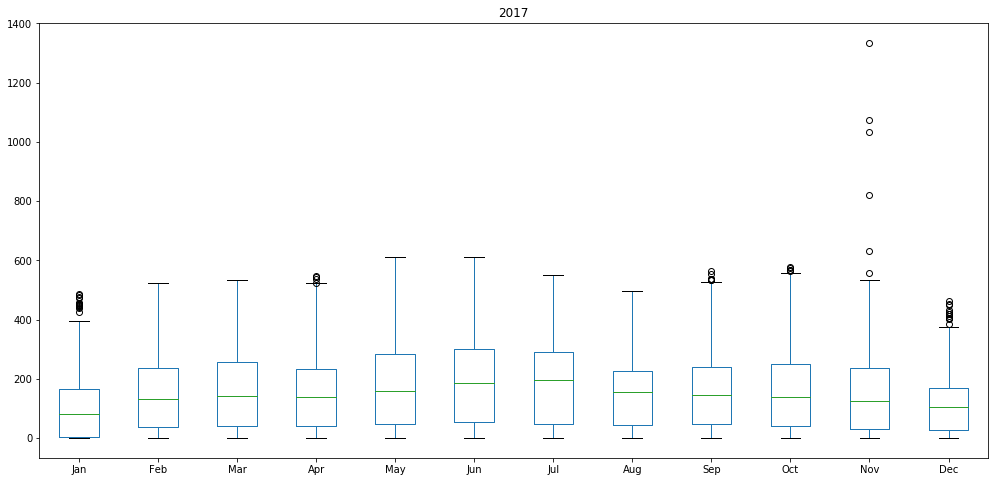

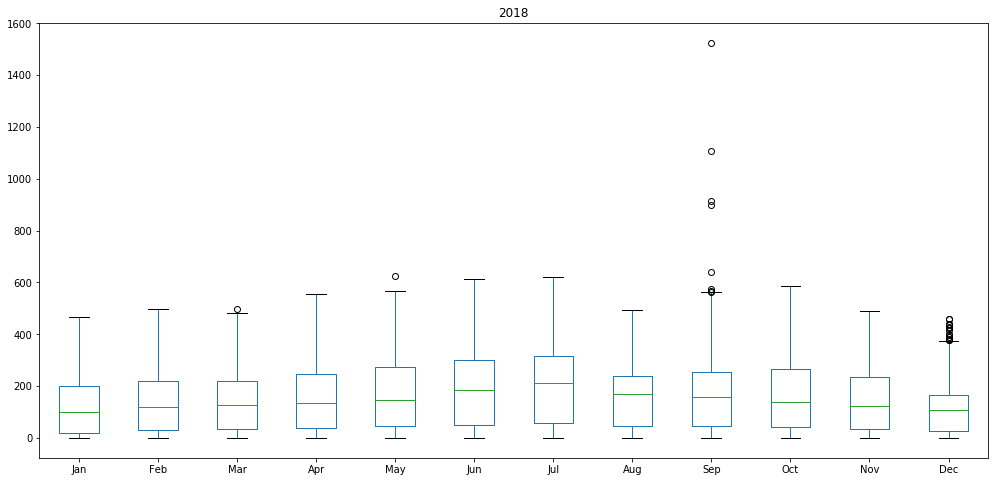

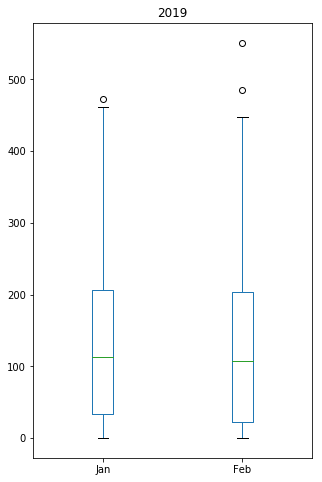

In [28]:
mam_17.plot(kind='box', figsize=(17,8), title='2017')
mam_18.plot(kind='box', figsize=(17,8), title='2018')
mam_19.plot(kind='box', figsize=(5,8), title='2019')

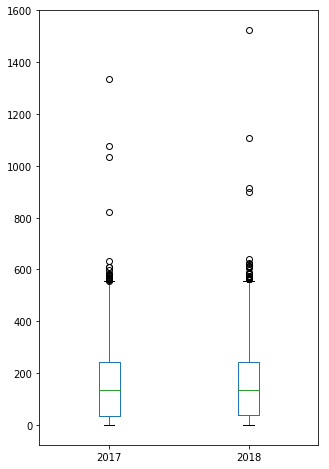

In [29]:
#Since the maragall data contains 2018 and almost all 2017, let's compare the distribution of each using boxplots:
marag_years[['2017', '2018']].plot(kind='box', figsize=(5,8))

In [30]:
jaume_groups = jaume_df.groupby(pd.Grouper(freq= 'M'))
jaume_months = pd.concat([pd.DataFrame(x[1].values) for x in jaume_groups], axis = 1)
jaume_months.columns = ['Dec', 'Jan', 'Feb']

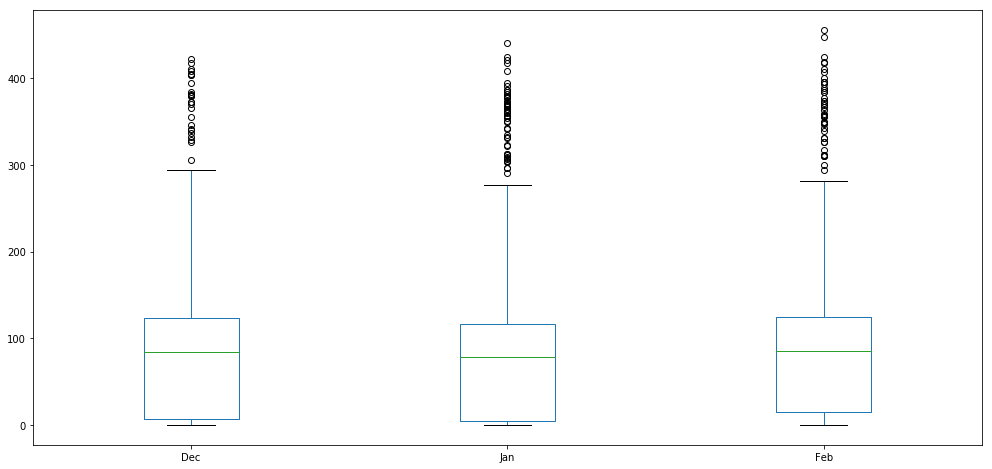

In [31]:
jaume_months.plot(kind='box', figsize=(17,8))

### Heatmaps

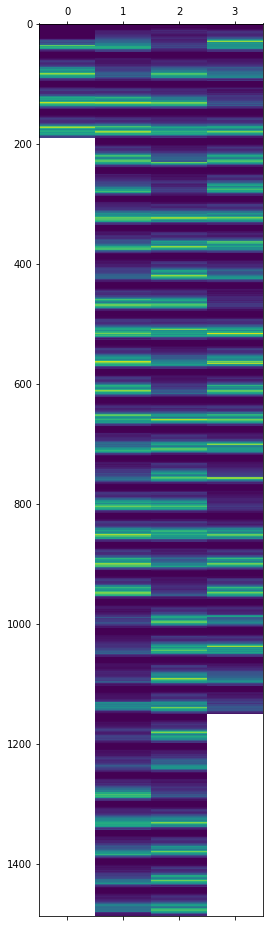

In [32]:
#Casc antic
plt.matshow(ravn_months, interpolation=None, aspect='auto')

    Since the data has a very high resolution, a heatmap would show more clarifying information if the data is grouped by day.

In [33]:
#Grouping by day number


ravnm_groups = (ravn_df.groupby(pd.Grouper(freq= 'D')).sum()).groupby(pd.Grouper(freq= 'M'))

ravn_month_df = pd.DataFrame
for k, p in ravnm_groups:
    tempdf = ravnm_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.month[:1][0])]    
    tempdf['day'] = tempdf.index.day
    if ravn_month_df.empty:
        ravn_month_df = tempdf
    else:
        ravn_month_df = pd.merge(ravn_month_df, tempdf, how='outer', on='day')

ravn_month_df.sort_values('day', inplace=True)
ravn_month_df.set_index('day', inplace=True, drop=True)

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [34]:
ravn_month_df.head()

,11,12,1,2
day,,,,
1,NaN,21697,8885,25383.0
2,NaN,12341,22820,17790.0
3,NaN,28056,24941,10822.0
4,NaN,28342,24281,25230.0
5,NaN,28262,18289,25494.0


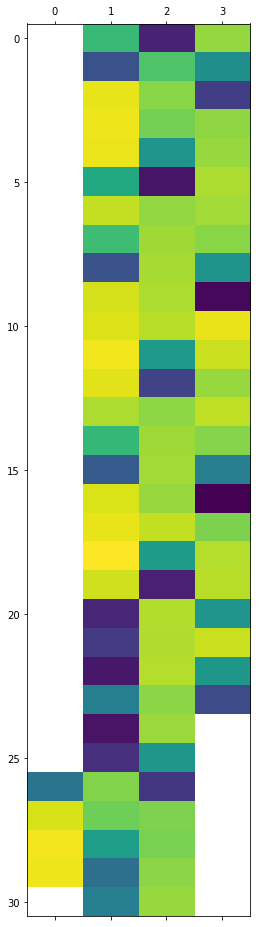

In [35]:
plt.matshow(ravn_month_df, interpolation=None, aspect='auto')

    On the casc antic data, since we have 4 months, grouping by day number doesn't seem to show relevant information. It might be better to merge the table by day of the week:

In [36]:
ravn_groups = (ravn_df.groupby(pd.Grouper(freq= 'D')).sum()).groupby(pd.Grouper(freq= 'M'))
testing_df = pd.DataFrame
import datetime
import calendar

def week_of_month(tgtdate):
    #tgtdate = tgtdate.to_datetime()

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we canuse the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1

for k, p in ravnm_groups:
    tempdf = ravnm_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.month[:1][0])]
    tempdf['date'] = tempdf.index
    tempdf['calendar_wom'] = tempdf['date'].apply(week_of_month)
    tempdf['wom'] = tempdf['date'].apply(lambda x: (x.day - 1) // 7 + 1)
    tempdf['key'] = tempdf['calendar_wom'].astype(str) + '-' + tempdf.index.strftime('%w').astype(str)
     
    if testing_df.empty:
        #tempdf['time'] = tempdf.index.strftime('%a') + tempdf.index.strftime('%U')
        testing_df = tempdf.drop(['date','wom', 'calendar_wom'], axis=1)
    else:
        #tempdf['time'] = tempdf.index.strftime('%a') + (tempdf.index.strftime('%U').astype(int)-4*i).astype(str)
        testing_df = pd.merge(testing_df, tempdf.drop(['date','wom', 'calendar_wom'], axis=1), how='outer', on='key')
        
testing_df.sort_values(by='key', inplace=True)
#ravn_wd_df.set_index('time', inplace=True, drop=True)

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

## Careful: grouping not done properly:

In [37]:
testing_df

,11,key,12,1,2
5,NaN,0-0,12341.0,8041.0,10822.0
31,NaN,0-2,NaN,8885.0,NaN
32,NaN,0-3,NaN,22820.0,NaN
33,NaN,0-4,NaN,24941.0,NaN
34,NaN,0-5,NaN,24281.0,25383.0
4,NaN,0-6,21697.0,18289.0,17790.0
12,NaN,1-0,12457.0,11290.0,7258.0
6,NaN,1-1,28056.0,25325.0,25230.0
7,NaN,1-2,28342.0,25716.0,25494.0
8,NaN,1-3,28262.0,26033.0,26184.0


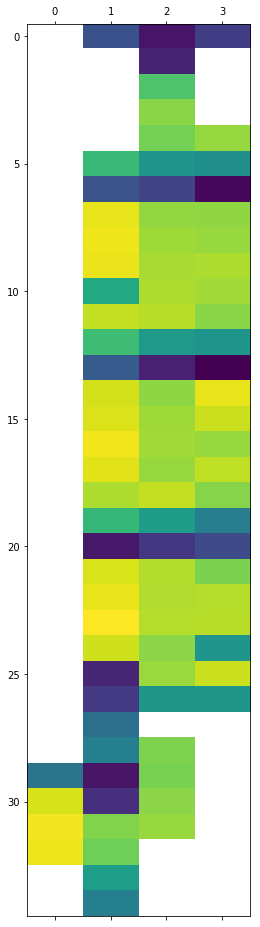

In [38]:
plt.matshow(testing_df.drop(['key'], axis=1), interpolation=None, aspect='auto')

In [39]:
# In the case of maragall, given that we have almost 2 years of complete data, we can plot both of them
# to check for a yearly trend:

maragm_groups = (marag_df.groupby(pd.Grouper(freq= 'D')).sum()).groupby(pd.Grouper(freq= 'A'))

marag_hm_df = pd.DataFrame
for k, p in maragm_groups:
    tempdf = maragm_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.year[:1][0])]    
    tempdf['date'] = tempdf.index.strftime('%m-%d')
    if marag_hm_df.empty:
        marag_hm_df = tempdf
    else:
        marag_hm_df = pd.merge(marag_hm_df, tempdf, how='outer', left_on='date', right_on='date')

marag_hm_df.sort_values('date', inplace=True)
#marag_years.drop('time', axis=1, inplace=True)
marag_hm_df.set_index(marag_hm_df['date'], inplace=True, drop=True)

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [40]:
marag_hm_df.head()

,2017,date,2018,2019
date,,,,
01-01,NaN,01-01,624,2785.0
01-02,NaN,01-02,1499,5659.0
01-03,NaN,01-03,1846,5784.0
01-04,177.0,01-04,5312,6276.0
01-05,0.0,01-05,6052,3742.0


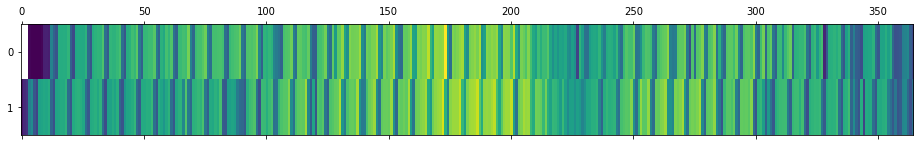

In [41]:
plt.matshow(marag_hm_df[['2017', '2018']].T, interpolation=None, aspect='auto')

## IMPROVEMENT: try to concat by closest day name

In [27]:
marag_df.head()

,TotalEntries
Timestamp,
2017-01-04 00:00:00,0
2017-01-04 00:30:00,0
2017-01-04 01:00:00,0
2017-01-04 01:30:00,0
2017-01-04 02:00:00,0


In [24]:

maraghm_groups = (marag_df.groupby(pd.Grouper(freq= 'D')).sum()).groupby(pd.Grouper(freq= 'A'))

marag_hm_df = pd.DataFrame
for k, p in maraghm_groups:
    tempdf = maraghm_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.year[:1][0])]    
    tempdf['key'] = tempdf.index.strftime('%U').astype(str) + '-' + tempdf.index.strftime('%w').astype(str)
    
    if marag_hm_df.empty:
        marag_hm_df = tempdf
    else:
        marag_hm_df = pd.merge(marag_hm_df, tempdf, how='outer', on='key')

marag_hm_df.sort_values('key', inplace=True)
#marag_years.drop('time', axis=1, inplace=True)
#marag_hm_df.set_index(marag_hm_df['date'], inplace=True, drop=True)

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


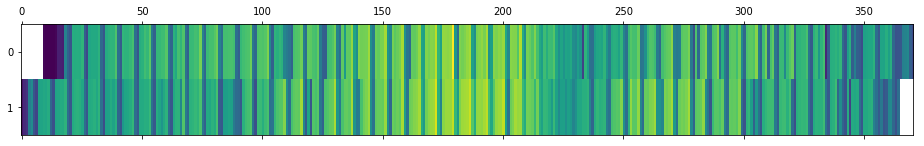

In [43]:
plt.matshow(marag_hm_df[['2017', '2018']].T, interpolation=None, aspect='auto')

In [44]:
jaume_m_groups = (jaume_df.groupby(pd.Grouper(freq= 'D')).sum()).groupby(pd.Grouper(freq= 'M'))

jaume_month_df = pd.DataFrame
for k, p in jaume_m_groups:
    tempdf = jaume_m_groups.get_group(k) 
    tempdf.columns = [str(tempdf.index.month[:1][0])]    
    tempdf['day'] = tempdf.index.day
    if jaume_month_df.empty:
        jaume_month_df = tempdf
    else:
        jaume_month_df = pd.merge(jaume_month_df, tempdf, how='outer', left_on='day', right_on='day')

jaume_month_df.sort_values('day', inplace=True)
jaume_month_df.set_index('day', inplace=True, drop=True)

/home/quark/anaconda3/envs/mpro/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


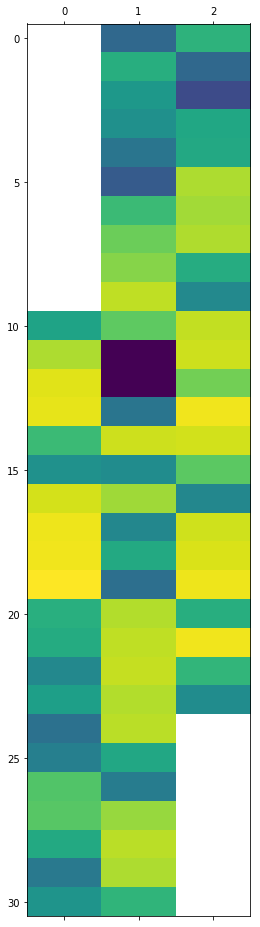

In [45]:
plt.matshow(jaume_month_df, interpolation=None, aspect='auto')

### Insights extracted
    For the raval_nord and jaume_I data, we can observe periods of 5 days in lighter colours, followed by two days of darker colors, which points towards a decrease of people traffic during the weekend. The maragall data shows a bigger picture: not only confirms the weekdays-weekend cycle, but shows a decrease of traffic between days 200 - 250. Those correspond to the period between late july and early september, so apparently the data shows what could be expected.
    
    
    Apart from the heatmap information, the feeling of cyclical data can be seen on the line plot as well. From there, we detect some outliers and sensor malfunctioning: as corroborated by the domain experts, on the days in which the people traffic shows a flatline on 0 there was a problem with the system capturing the signal (both in maragall and jaume I data). Equally, on the peaks detected both on 2017 and 2018 there was a problem in which the sensors read people traffic abnormally, resulting in outliers.
    
### Confirm outliers interpretation!!
    

## Lag scatter plots

ValueError: num must be 1 <= num <= 8, not 9

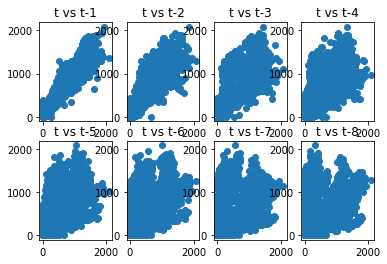

In [60]:
ravn_lags = ravn_df.copy()
values = pd.DataFrame(ravn_lags.values)
columns = [values]
for i in range(1, 49):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis = 1)
columns = ['t']
for i in range(1, 49):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1)
for i in range(1, 20):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

In [50]:
dataframe.head()

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-39,t-40,t-41,t-42,t-43,t-44,t-45,t-46,t-47,t-48
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


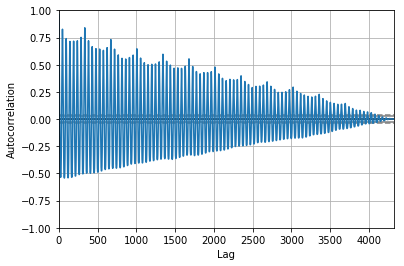

In [61]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ravn_df)
plt.show()

In [62]:
ravn_df.shape

(4320, 1)

In [ ]:
marag_lags = marag_df.copy()
values = pd.DataFrame(ravn_lags.values)
columns = [values]
for i in range(1, 8):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis = 1)
columns = ['t']
for i in range(1, 8):
    columns.append('t-' + str(i))
dataframe.columns = columns

plt.figure(1)
for i in range(1, 8):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(marag_df, alpha=0.5)
plt.show()

## Detecting possible outliers: Check for max and MIN

Raval_nord

In [ ]:
ravn_df.loc[cat_df['TotalEntries'] == ravn_df['TotalEntries'].max()]

In [ ]:
ravn_df.groupby(pd.Grouper(freq= 'D')).sum().columns

maragall

In [52]:
marag_df.loc[marag_df['TotalEntries'] == marag_df[marag_df.index.year == 2017]['TotalEntries'].max()]

,TotalEntries
Timestamp,
2017-11-11 19:00:00,1335


In [53]:
marag_df.loc[marag_df['TotalEntries'] == marag_df[marag_df.index.year == 2018]['TotalEntries'].max()]

,TotalEntries
Timestamp,
2018-09-11 18:00:00,1525


In [54]:
marag_df.loc[marag_df['TotalEntries'] == marag_df[marag_df.index.year == 2019]['TotalEntries'].max()]

,TotalEntries
Timestamp,
2017-10-17 18:00:00,551
2019-02-11 18:30:00,551


In [55]:
48*30

1440

# Decomposition of maragall time series

In [56]:
def append_lags(x, N):
    temp_df = x.copy()#.sort_values(x.index, inplace = True)
    for i in range (1, N+1):
        temp_df['t-' + str(i)] = x['TotalEntries'].shift(i)
    return temp_df


In [57]:
marag_df.shape

(37344, 1)

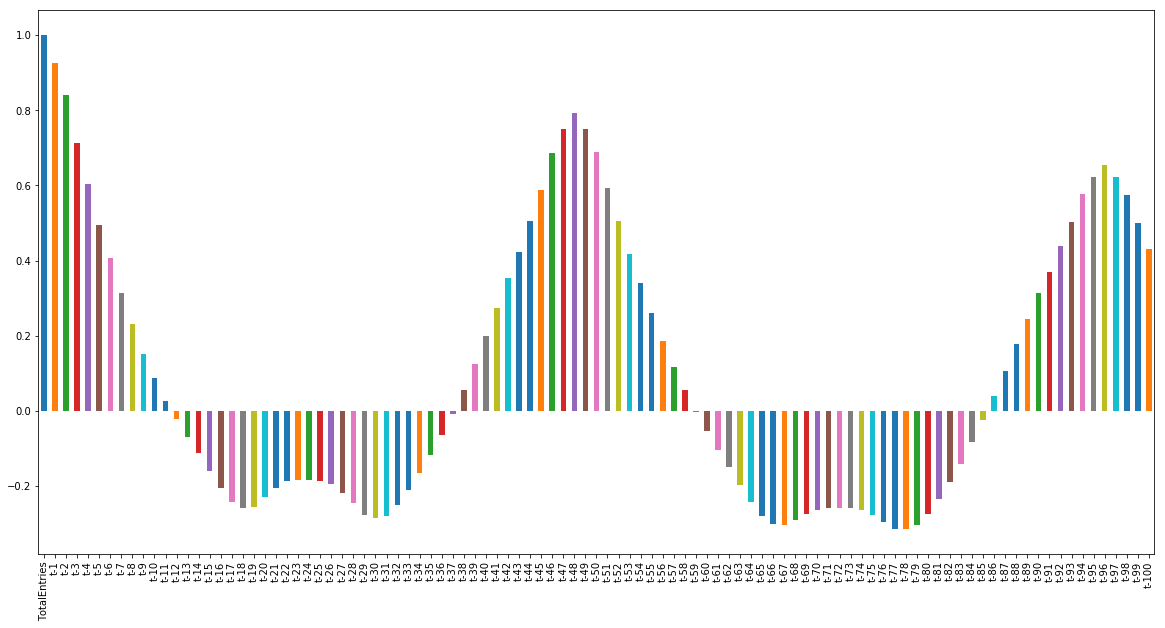

In [58]:
marag_test_lags = append_lags(marag_df, 100)
marag_test_lags.iloc[100:].corr()['TotalEntries'].plot(kind='bar')

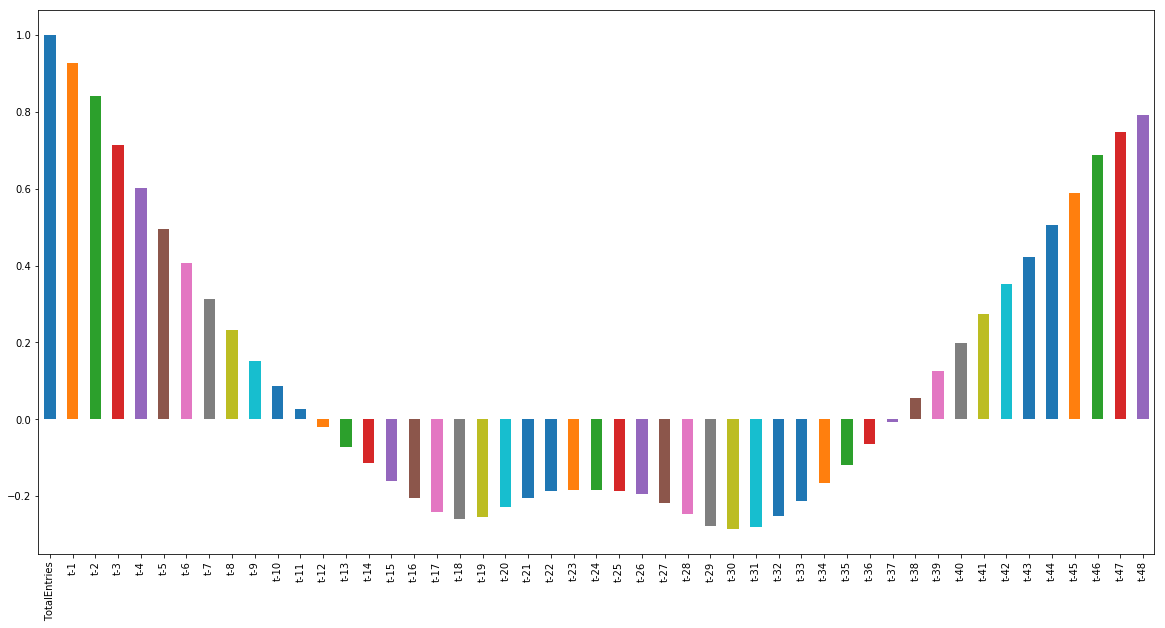

In [59]:
marag_with_lags = append_lags(marag_df, 48)
marag_with_lags = marag_with_lags.iloc[48:]
marag_with_lags.iloc[48:].corr()['TotalEntries'].plot(kind='bar')

    A cycle of 48 lags is observed, containing all the observations in one day.

In [60]:
marag_with_lags['diff48'] = marag_with_lags['TotalEntries'] - marag_with_lags['t-48']

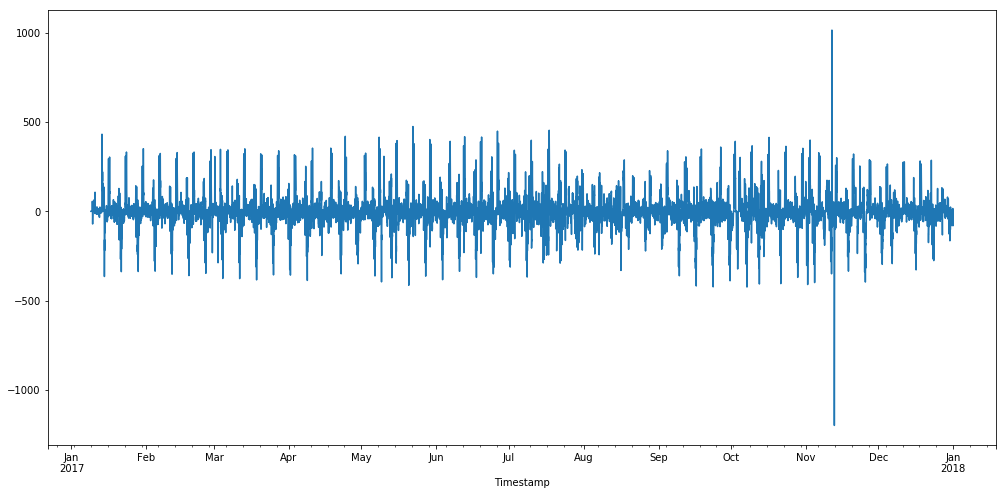

In [61]:
# Non estationary series

marag_with_lags[marag_with_lags.index.year == 2017]['diff48'].plot(figsize=(17,8))

In [62]:
marag_with_lags.head()

,TotalEntries,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-40,t-41,t-42,t-43,t-44,t-45,t-46,t-47,t-48,diff48
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-09 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09 00:30:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09 01:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09 01:30:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09 02:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
marag_with_lags['mean'] = marag_with_lags.drop(['diff48'], axis = 1).mean(axis = 1)

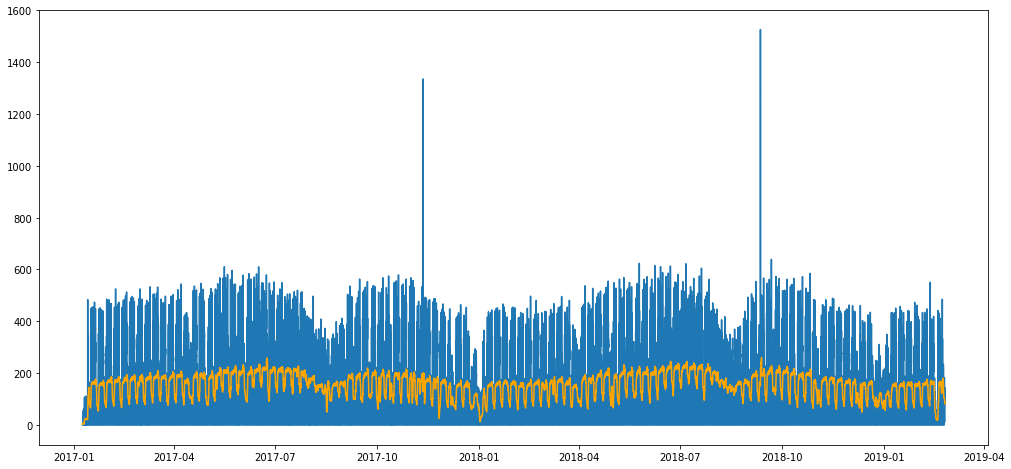

In [69]:
plt.figure(figsize=(17,8))
plt.plot(marag_with_lags['TotalEntries'])
plt.plot(marag_with_lags.index, marag_with_lags['mean'], color = 'orange')

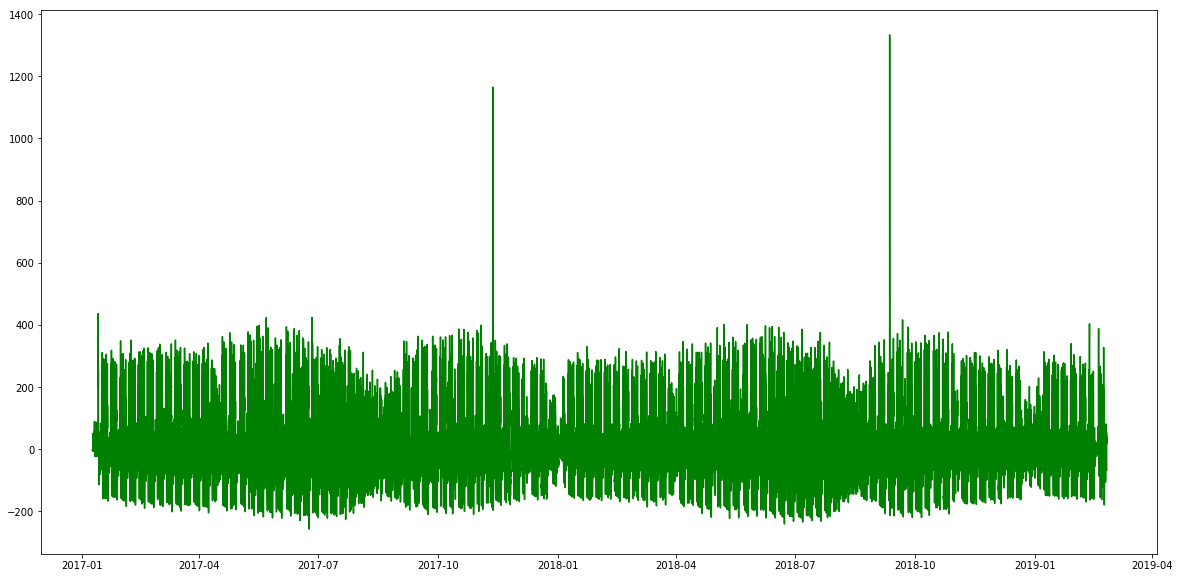

In [70]:
plt.plot(marag_with_lags.index, marag_with_lags['TotalEntries'] - marag_with_lags['mean'], color = 'green')

## We can apply polinomial regression techniques to model the stationarity:

In [74]:
marag_with_lags['seasonal'] = marag_with_lags['TotalEntries'] - marag_with_lags['mean']
marag_with_lags['day'] = marag_with_lags.index.day
marag_seasons = marag_with_lags[['day', 'seasonal']].copy()

In [75]:
max_degree = 10
for i in range(2, max_degree + 1):
    marag_seasons['day'+str(i)] =  marag_seasons['day']**i

In [76]:
marag_seasons.head()

,day,seasonal,day2,day3,day4,day5,day6,day7,day8,day9,day10
Timestamp,,,,,,,,,,,
2017-01-09 00:00:00,9,-3.612245,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401
2017-01-09 00:30:00,9,-3.612245,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401
2017-01-09 01:00:00,9,-3.612245,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401
2017-01-09 01:30:00,9,-3.612245,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401
2017-01-09 02:00:00,9,-3.612245,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401


In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(marag_seasons.drop(['seasonal'],axis=1),marag_seasons['seasonal'])
seasonal_hat = reg.predict([[day**i for i in range(1, max_degree+1)] 
                 for day in range(1, 32)])
seasonal_hat_df = pd.DataFrame({
        'day': range(1, 32),
        'seasonal_hat': seasonal_hat
    })

In [78]:
seasonal_hat_df.head()

,day,seasonal_hat
0,1,-10.577209
1,2,0.687818
2,3,5.714541
3,4,5.495152
4,5,2.911332


In [81]:
marag_with_lags.shape

(37296, 53)

In [82]:
seasonal_hat_df.shape

(31, 2)

In [85]:
marag_with_lags['day'].describe()

count    37296.000000
mean        15.747748
std          8.737274
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64

In [95]:
marag_with_lags.head()

,TotalEntries,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-43,t-44,t-45,t-46,t-47,t-48,diff48,mean,seasonal,day
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-09 00:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9
2017-01-09 00:30:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9
2017-01-09 01:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9
2017-01-09 01:30:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9
2017-01-09 02:00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9


In [88]:
marag_with_lags_total = marag_with_lags.merge(seasonal_hat_df, how='inner', on='day')

In [99]:
marag_with_lags_total['residual'] = marag_with_lags_total['seasonal'] - marag_with_lags_total['seasonal_hat']
marag_with_lags_total.head()

,TotalEntries,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-45,t-46,t-47,t-48,diff48,mean,seasonal,day,seasonal_hat,residual
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9,0.161577,-3.773822
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9,0.161577,-3.773822
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9,0.161577,-3.773822
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9,0.161577,-3.773822
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.612245,-3.612245,9,0.161577,-3.773822


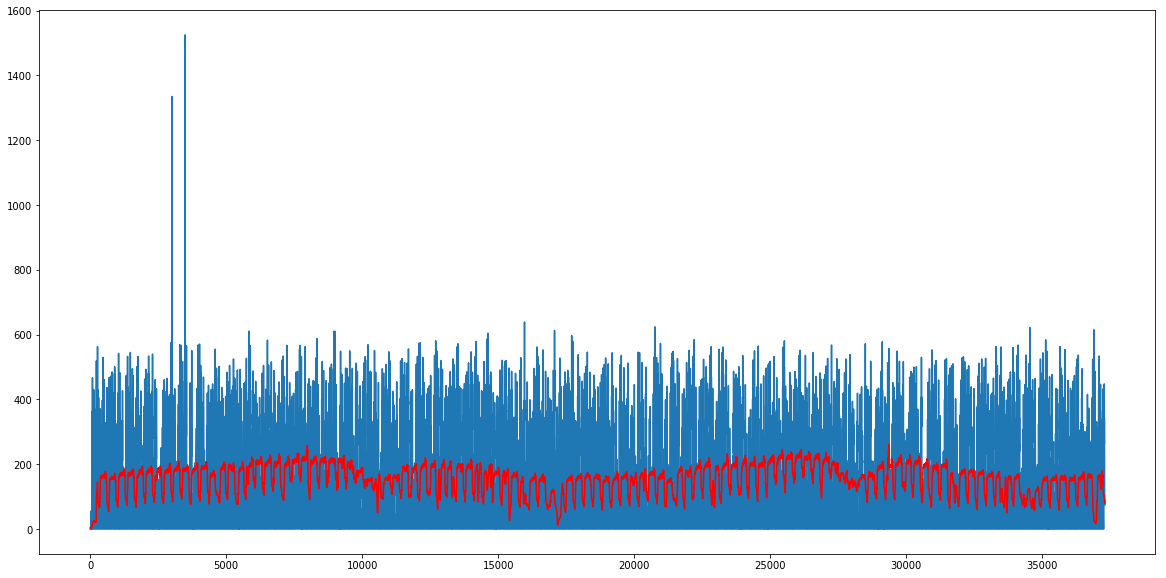

In [98]:
plt.plot(marag_with_lags_total['TotalEntries'])
plt.plot(marag_with_lags_total.index, marag_with_lags['mean'], color = 'red')

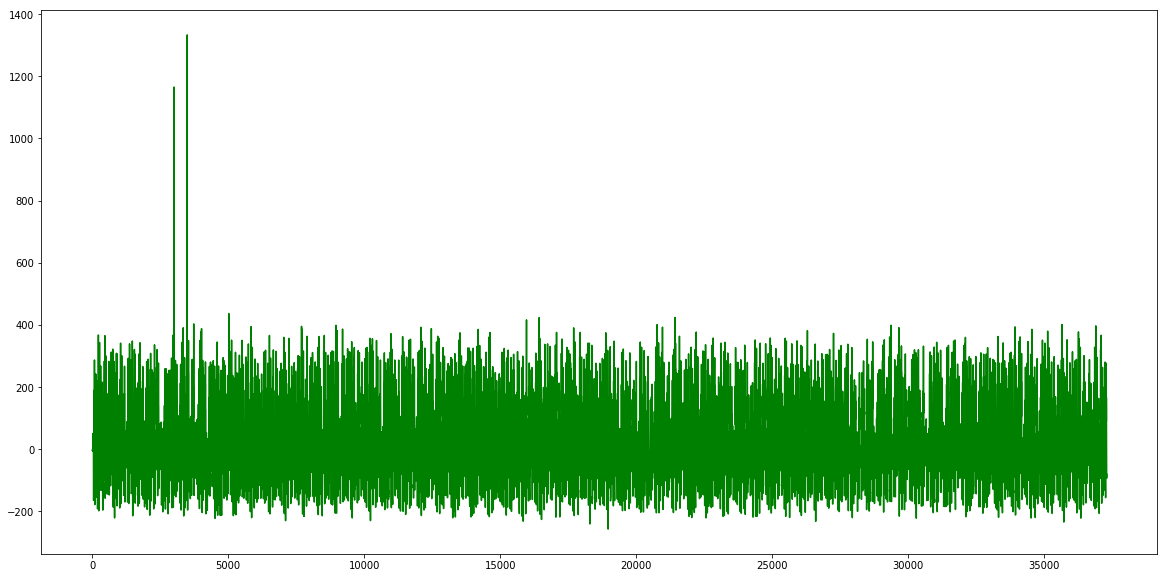

In [94]:
plt.plot(marag_with_lags_total.index, marag_with_lags_total['seasonal'], color = 'green')

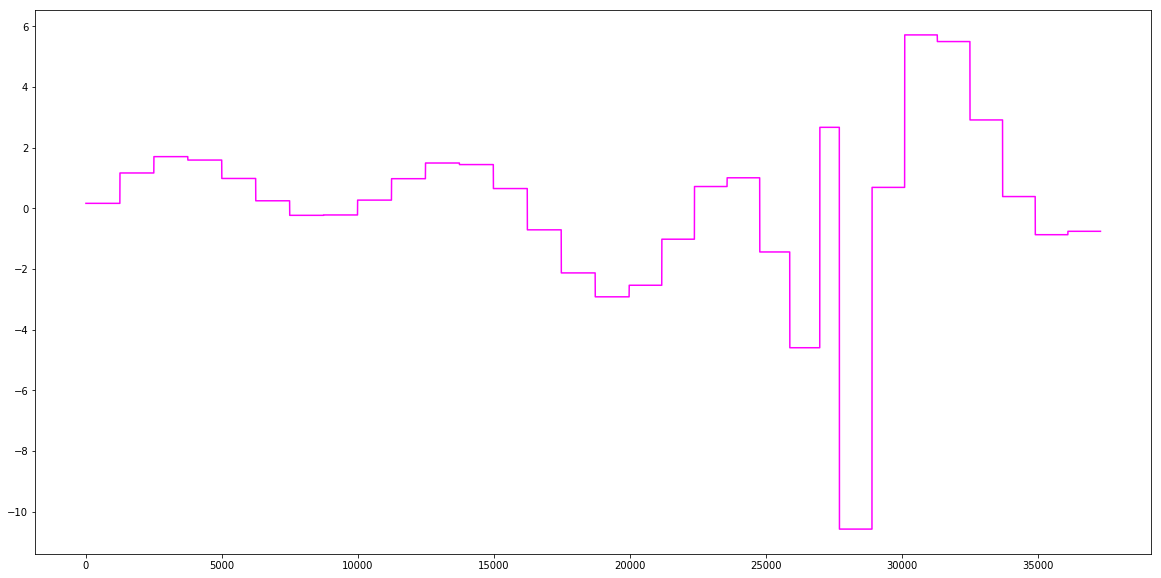

In [101]:
plt.plot(marag_with_lags_total.index, marag_with_lags_total['seasonal_hat'], color = 'magenta')

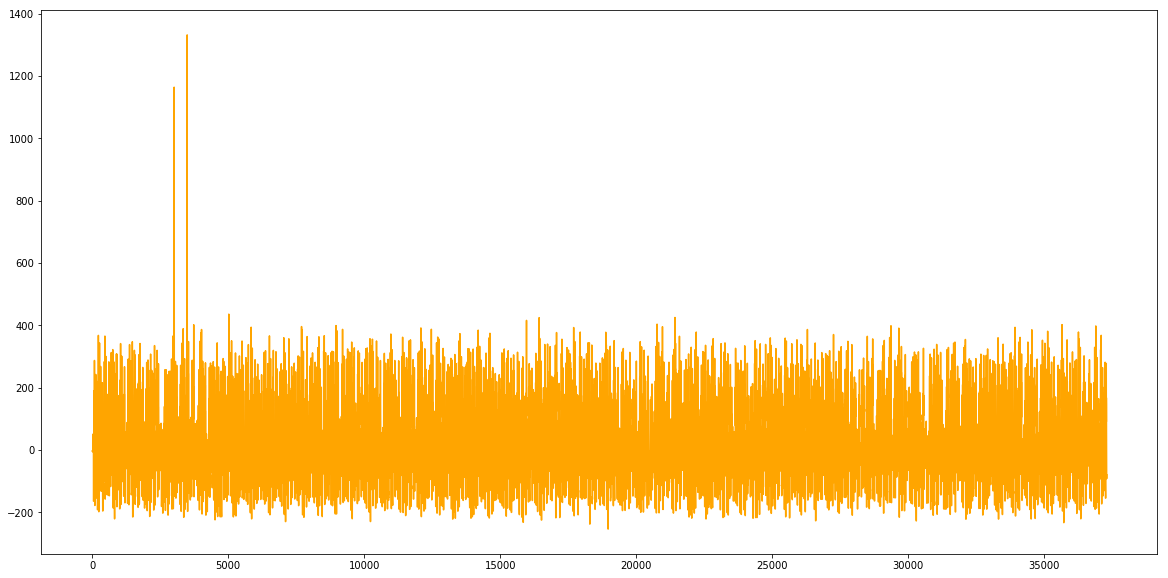

In [102]:
plt.plot(marag_with_lags_total.index, marag_with_lags_total['residual'], color = 'orange')

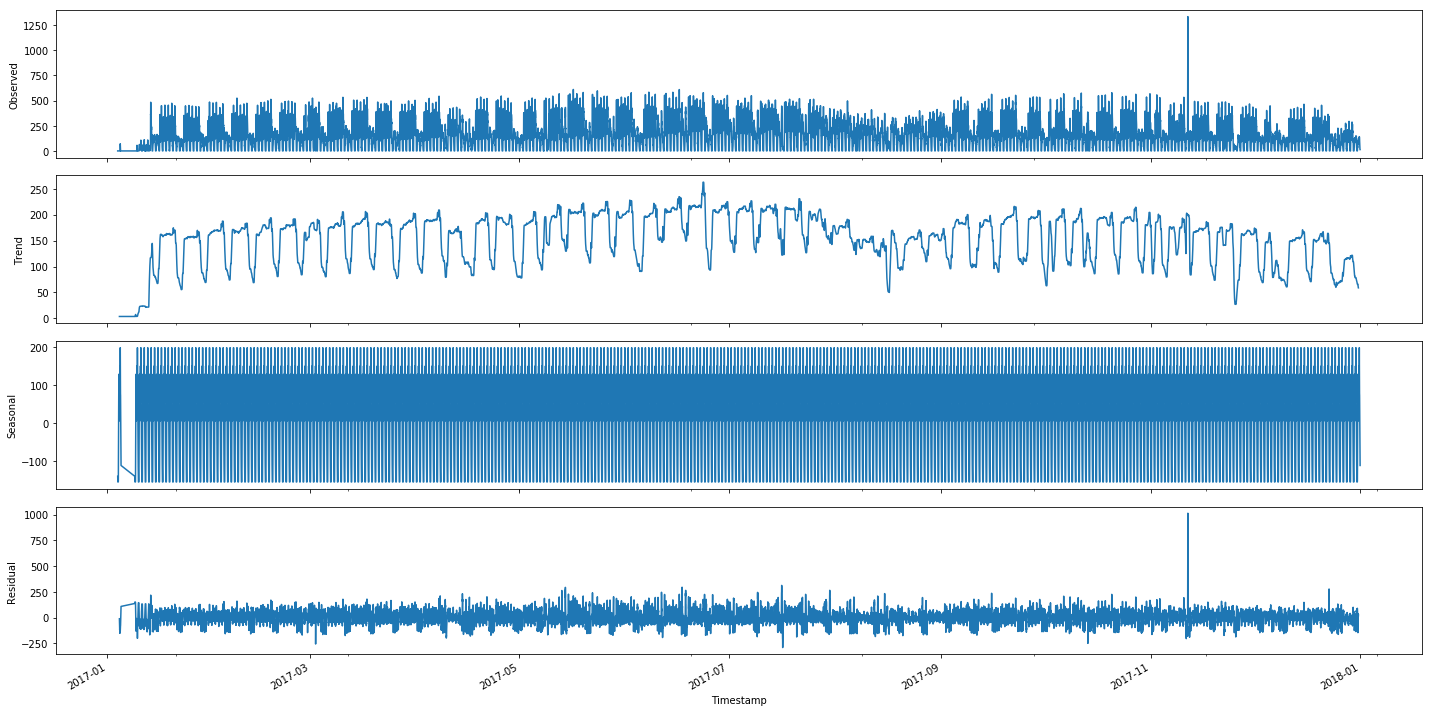

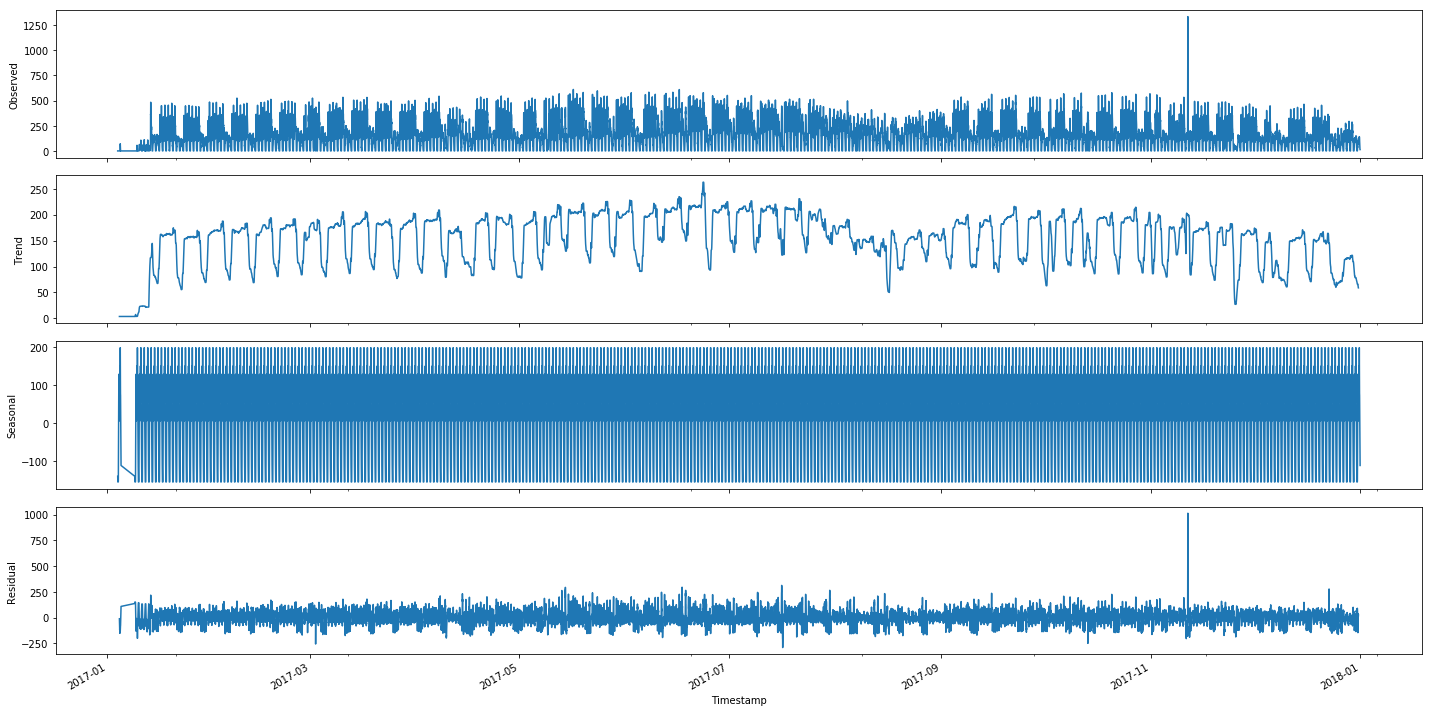

In [163]:
additive_2017 = seasonal_decompose(marag_dec_df[marag_dec_df.index.year == 2017]['TotalEntries'].astype(np.float64), model='additive', freq=48)
additive_2017.plot()

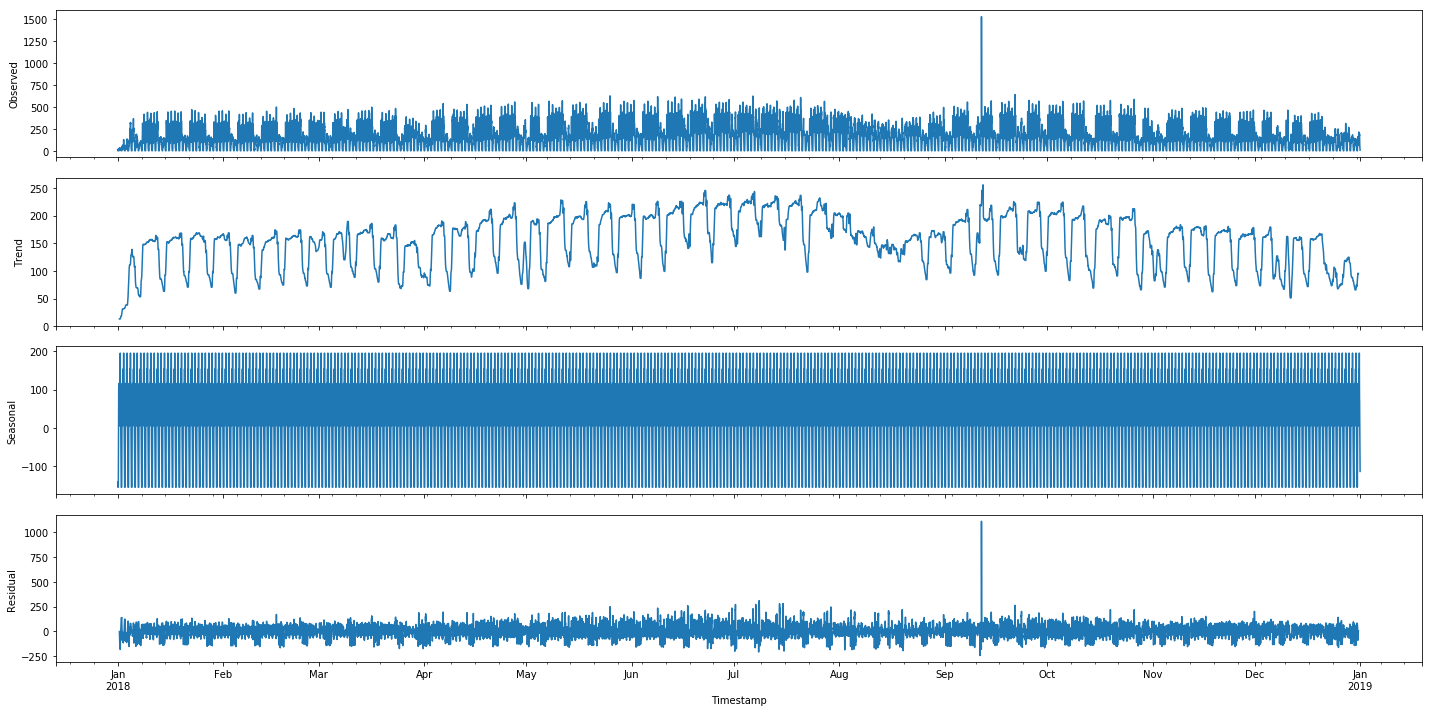

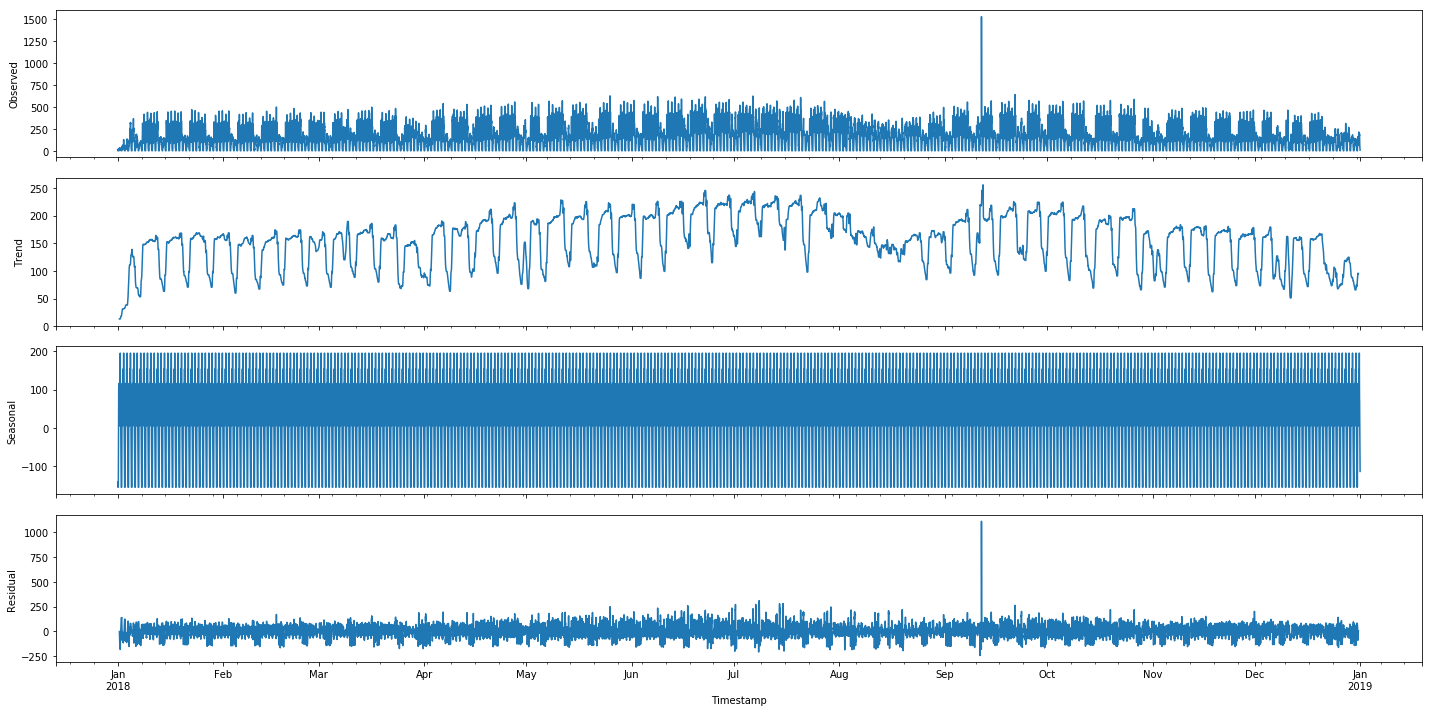

In [164]:
seasonal_decompose(marag_dec_df[marag_dec_df.index.year == 2018]['TotalEntries'].astype(np.float64), model='additive', freq=48).plot()

In [6]:
# Demonstrate the data series is not stationary: Dickey-Fuller test

#CAREFUL: CHECK CODE!!!

from statsmodels.tsa.stattools import adfuller
result = adfuller(marag_df['TotalEntries'])
print( ' ADF Statistic: %f ' % result[0])
print( ' p-value: %f ' % result[1])
print( ' Critical Values: ' )
for key, value in result[4].items():
    print( ' \t%s: %.3f ' % (key, value))

 ADF Statistic: -12.178535 
 p-value: 0.000000 
 Critical Values: 
 	1%: -3.431 
 	5%: -2.862 
 	10%: -2.567 


In [4]:
marag_df.head()

,TotalEntries
Timestamp,
2017-01-04 00:00:00,0
2017-01-04 00:30:00,0
2017-01-04 01:00:00,0
2017-01-04 01:30:00,0
2017-01-04 02:00:00,0


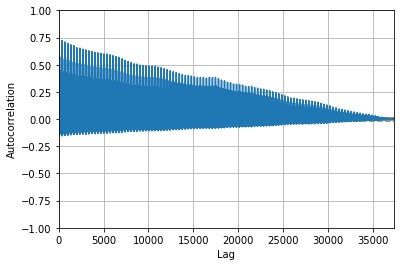

In [13]:
pd.plotting.autocorrelation_plot((marag_df['TotalEntries'] - marag_df['TotalEntries'].shift(1))[1:])

In [10]:
(marag_df['TotalEntries'] - marag_df['TotalEntries'].shift(1)).head()

Timestamp
2017-01-04 00:00:00    NaN
2017-01-04 00:30:00    0.0
2017-01-04 01:00:00    0.0
2017-01-04 01:30:00    0.0
2017-01-04 02:00:00    0.0
Name: TotalEntries, dtype: float64

## W / M exploratory analysis

    CAREFUL: on Raval Nord (SiteId = 1) there's no sex recording from 2019-02-21 11:00:00 to 2019-02-24 23:30:00

In [ ]:
# REPEAT exploratory with W / M data to check for possible differences

original_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/datos.xlsx')
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')

ravn_df = original_df[original_df['SiteId'] == 1][['Timestamp', 'TotalEntries']]
ravn_df.set_index('Timestamp', inplace=True)
marag_df = original_df[original_df['SiteId'] == 2][['Timestamp', 'TotalEntries']]
marag_df.set_index('Timestamp', inplace=True)
jaume_df = original_df[original_df['SiteId'] == 3][['Timestamp', 'TotalEntries']]
jaume_df.set_index('Timestamp', inplace=True)

In [2]:
original_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/datos.xlsx')
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')
original_df.columns

Index(['Id', 'CustomerId', 'SiteId', 'Timestamp', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'TotalEntries', 'TotalOuts', 'TotalAccesses',
       'TotalFraudEntries', 'TotalFraudOuts', 'TotalFraud', 'TotalEntriesMen',
       'TotalEntriesWoman', 'TotalEntriesAverageAge', 'MenEntriesAverageAge',
       'WomenEntriesAverageAge', 'TotalEntriesGroupAge_0_14',
       'TotalEntriesGroupAge_15_19', 'TotalEntriesGroupAge_20_24',
       'TotalEntriesGroupAge_25_29', 'TotalEntriesGroupAge_30_34',
       'TotalEntriesGroupAge_35_39', 'TotalEntriesGroupAge_40_44',
       'TotalEntriesGroupAge_45_49', 'TotalEntriesGroupAge_50_54',
       'TotalEntriesGroupAge_55_59', 'TotalEntriesGroupAge_60_99',
       'MenEntriesGroupAge_0_14', 'MenEntriesGroupAge_15_19',
       'MenEntriesGroupAge_20_24', 'MenEntriesGroupAge_25_29',
       'MenEntriesGroupAge_30_34', 'MenEntriesGroupAge_35_39',
       'MenEntriesGroupAge_40_44', 'MenEntriesGroupAge_45_49',
       'MenEntriesGroupAge_50_54', 'MenEntriesGrou

In [27]:
original_df.describe(include='all')

,Id,CustomerId,SiteId,Timestamp,Year,Month,Day,Hour,Minute,TotalEntries,...,WomenEntriesGroupAge_20_24,WomenEntriesGroupAge_25_29,WomenEntriesGroupAge_30_34,WomenEntriesGroupAge_35_39,WomenEntriesGroupAge_40_44,WomenEntriesGroupAge_45_49,WomenEntriesGroupAge_50_54,WomenEntriesGroupAge_55_59,WomenEntriesGroupAge_60_99,GeneratedByDaysPopulator
count,45216.000000,45216.0,45216.000000,45216,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,...,45024.000000,45024.000000,45024.000000,45024.000000,45024.000000,45024.000000,45024.000000,45024.000000,45024.000000,45216.0
unique,NaN,NaN,NaN,37344,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2019-01-15 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-02-24 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,24912.500000,11.0,1.983015,NaN,2017.792994,6.008493,15.772824,11.500000,15.000000,175.855759,...,8.591151,12.040290,17.279895,18.823428,8.458467,4.034337,2.132885,2.008418,1.113006,0.0
std,13052.879223,0.0,0.416909,NaN,0.714310,3.869452,8.723700,6.922263,15.000166,207.264220,...,12.465528,17.647382,21.714336,23.480545,11.260697,5.565701,3.034103,2.858220,1.687296,0.0
min,2305.000000,11.0,1.000000,NaN,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,13608.750000,11.0,2.000000,NaN,2017.000000,2.000000,8.000000,5.750000,0.000000,34.000000,...,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [9]:
original_df[['TotalEntries', 'TotalEntriesMen', 'TotalEntriesWoman']].describe(include='all')

,TotalEntries,TotalEntriesMen,TotalEntriesWoman
count,45216.000000,45024.000000,45024.000000
mean,175.855759,84.759906,90.164601
std,207.264220,97.972101,109.195292
min,0.000000,0.000000,0.000000
25%,34.000000,18.000000,15.000000
50%,132.000000,64.000000,68.000000
75%,249.000000,118.000000,128.000000
max,2082.000000,1032.000000,1050.000000


In [7]:
((original_df['TotalEntries'] + original_df['TotalOuts']) == original_df['TotalAccesses']).sum()

45216

In [105]:
((original_df['TotalEntriesMen'] + original_df['TotalEntriesWoman']) == original_df['TotalEntries']).sum()

45024

In [116]:
# Checking sum of man and woman consistency:

wm_check = original_df.dropna()
((wm_check['TotalEntriesMen'] + wm_check['TotalEntriesWoman']) == wm_check['TotalEntries']).sum()

36729

In [120]:
wm_check.shape

(36729, 54)

In [11]:
original_df.isnull().sum()

Id                               0
CustomerId                       0
SiteId                           0
Timestamp                        0
Year                             0
Month                            0
Day                              0
Hour                             0
Minute                           0
TotalEntries                     0
TotalOuts                        0
TotalAccesses                    0
TotalFraudEntries                0
TotalFraudOuts                   0
TotalFraud                       0
TotalEntriesMen                192
TotalEntriesWoman              192
TotalEntriesAverageAge        7375
MenEntriesAverageAge          7591
WomenEntriesAverageAge        8277
TotalEntriesGroupAge_0_14      192
TotalEntriesGroupAge_15_19     192
TotalEntriesGroupAge_20_24     192
TotalEntriesGroupAge_25_29     192
TotalEntriesGroupAge_30_34     192
TotalEntriesGroupAge_35_39     192
TotalEntriesGroupAge_40_44     192
TotalEntriesGroupAge_45_49     192
TotalEntriesGroupAge

In [13]:
original_df[original_df['TotalEntriesMen'].isnull()].describe(include='all')

,Id,CustomerId,SiteId,Timestamp,Year,Month,Day,Hour,Minute,TotalEntries,...,WomenEntriesGroupAge_20_24,WomenEntriesGroupAge_25_29,WomenEntriesGroupAge_30_34,WomenEntriesGroupAge_35_39,WomenEntriesGroupAge_40_44,WomenEntriesGroupAge_45_49,WomenEntriesGroupAge_50_54,WomenEntriesGroupAge_55_59,WomenEntriesGroupAge_60_99,GeneratedByDaysPopulator
count,192.000000,192.0,192.0,192,192.0,192.0,192.000000,192.000000,192.000000,192.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0
unique,NaN,NaN,NaN,192,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2019-02-21 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2019-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-02-24 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,47184.500000,11.0,1.0,NaN,2019.0,2.0,22.500000,11.500000,15.000000,394.234375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,162.014284,0.0,0.0,NaN,0.0,0.0,1.120957,6.940284,15.039216,385.072526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,46945.000000,11.0,1.0,NaN,2019.0,2.0,21.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,47064.750000,11.0,1.0,NaN,2019.0,2.0,21.750000,5.750000,0.000000,76.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
original_df[original_df['TotalEntriesWoman'].isnull()].describe(include='all')

,Id,CustomerId,SiteId,Timestamp,Year,Month,Day,Hour,Minute,TotalEntries,...,WomenEntriesGroupAge_20_24,WomenEntriesGroupAge_25_29,WomenEntriesGroupAge_30_34,WomenEntriesGroupAge_35_39,WomenEntriesGroupAge_40_44,WomenEntriesGroupAge_45_49,WomenEntriesGroupAge_50_54,WomenEntriesGroupAge_55_59,WomenEntriesGroupAge_60_99,GeneratedByDaysPopulator
count,192.000000,192.0,192.0,192,192.0,192.0,192.000000,192.000000,192.000000,192.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0
unique,NaN,NaN,NaN,192,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2019-02-21 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2019-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-02-24 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,47184.500000,11.0,1.0,NaN,2019.0,2.0,22.500000,11.500000,15.000000,394.234375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,162.014284,0.0,0.0,NaN,0.0,0.0,1.120957,6.940284,15.039216,385.072526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,46945.000000,11.0,1.0,NaN,2019.0,2.0,21.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,47064.750000,11.0,1.0,NaN,2019.0,2.0,21.750000,5.750000,0.000000,76.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
original_df[original_df['SiteId'] == 2]['TotalEntriesMen'].isnull().sum()

0

In [22]:
original_df[original_df['SiteId'] == 2]['TotalEntriesWoman'].isnull().sum()

0

In [23]:
original_df[original_df['SiteId'] == 3]['TotalEntriesMen'].isnull().sum()

0

In [24]:
original_df[original_df['SiteId'] == 3]['TotalEntriesWoman'].isnull().sum()

0

In [25]:
original_df[original_df['SiteId'] == 1]['TotalEntriesMen'].isnull().sum()

192

In [26]:
original_df[original_df['SiteId'] == 1]['TotalEntriesMen'].isnull().sum()

192

### Exploring the Box-Cox transformation 

In [116]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

c = 1
dataframe = pd.DataFrame(marag_df['TotalEntries'].values)
dataframe.columns = ['TotalEntries']

In [59]:
marag_df.head()

,TotalEntries
Timestamp,
2017-01-04 00:00:00,0
2017-01-04 00:30:00,0
2017-01-04 01:00:00,0
2017-01-04 01:30:00,0
2017-01-04 02:00:00,0


In [61]:
marag_df.tail()

,TotalEntries
Timestamp,
2019-02-24 21:30:00,79
2019-02-24 22:00:00,53
2019-02-24 22:30:00,29
2019-02-24 23:00:00,20
2019-02-24 23:30:00,13


In [66]:
dataframe.head()

,TotalEntries
0,0
1,0
2,0
3,0
4,0


In [62]:
dataframe.tail()

,TotalEntries
37339,79
37340,53
37341,29
37342,20
37343,13


In [71]:
dataframe['TotalEntries'], lam = boxcox(dataframe['TotalEntries'])
lam

In [96]:
trans_marag_df = marag_df.copy()
for x in tqdm(range(len(marag_df))):
    trans_marag_df['TotalEntries'][x:(x+1)] = trans_marag_df['TotalEntries'][x:(x+1)] + c 

trans_marag_df['TotalEntries'], lam_marag = boxcox(trans_marag_df['TotalEntries'])
lam_marag

100%|██████████| 37344/37344 [00:27<00:00, 1350.12it/s]


0.36376370269585795

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe00dae76a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe004f1dda0>)

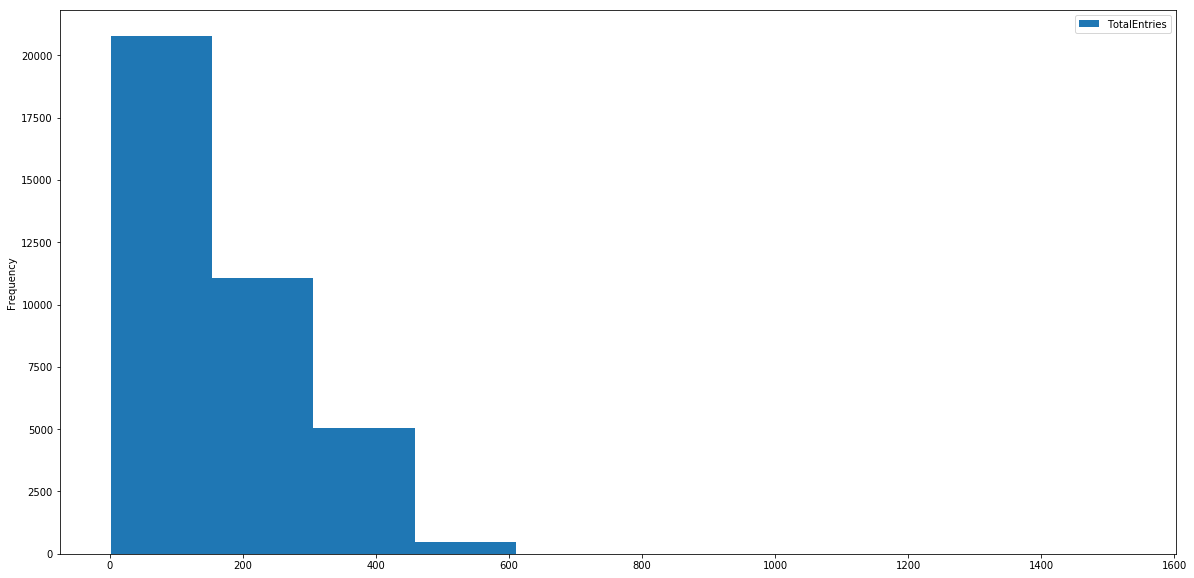

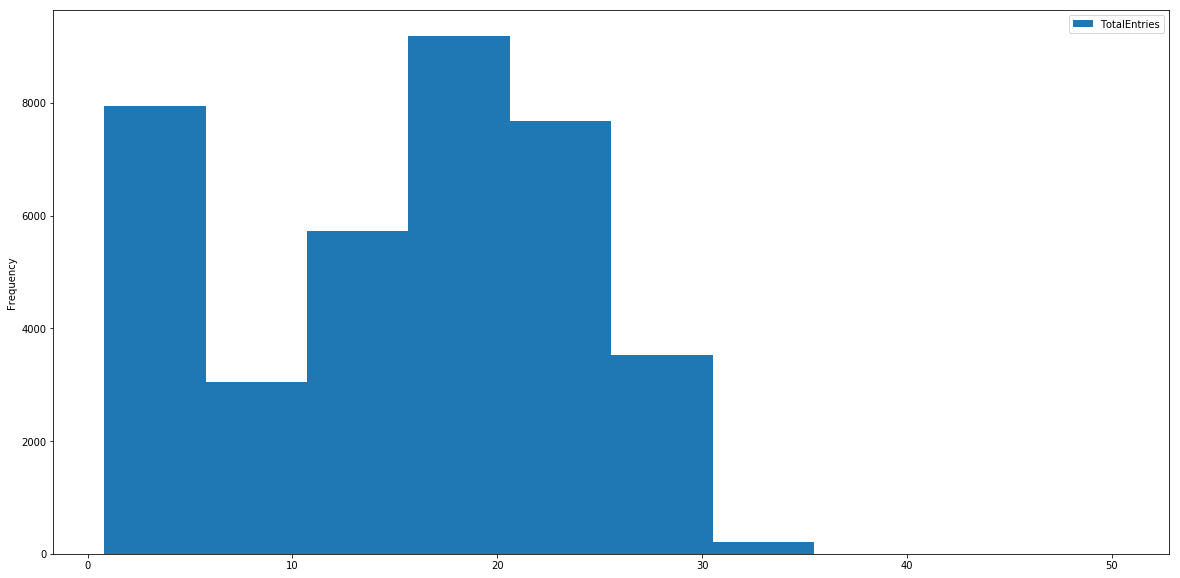

In [81]:
marag_df.plot(kind='hist'), trans_marag_df.plot(kind='hist')

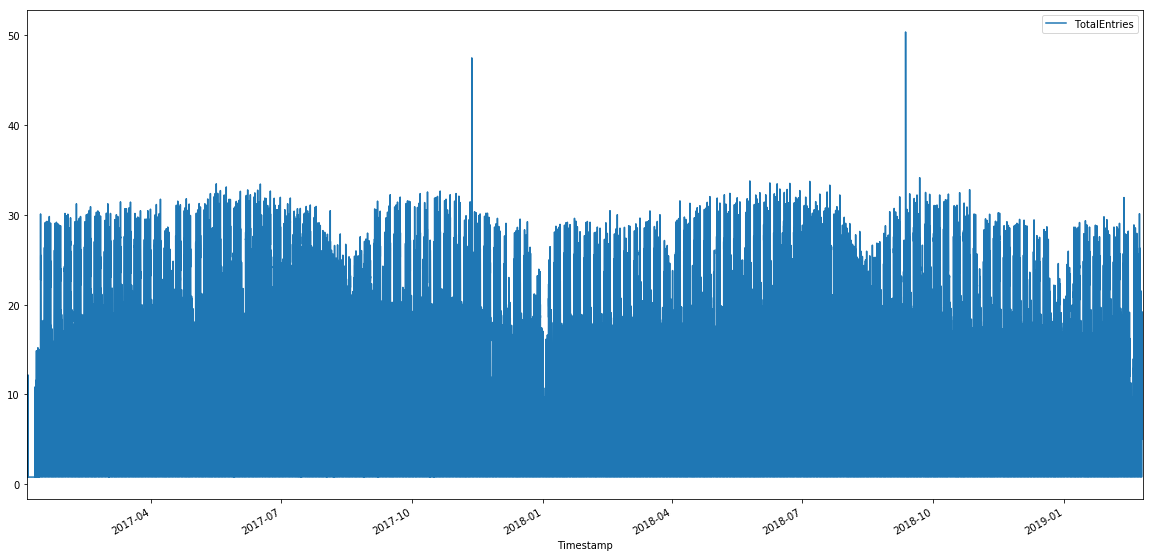

In [87]:
trans_marag_df.plot()

In [97]:
trans_ravn_df = ravn_df.copy()
for x in tqdm(range(len(ravn_df))):
    trans_ravn_df['TotalEntries'][x:(x+1)] = trans_ravn_df['TotalEntries'][x:(x+1)] + c 

trans_ravn_df['TotalEntries'], lam_ravn = boxcox(trans_ravn_df['TotalEntries'])
lam_ravn

100%|██████████| 4320/4320 [00:03<00:00, 1333.39it/s]


0.2966522249858163

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe004e9b6d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe004e0c828>)

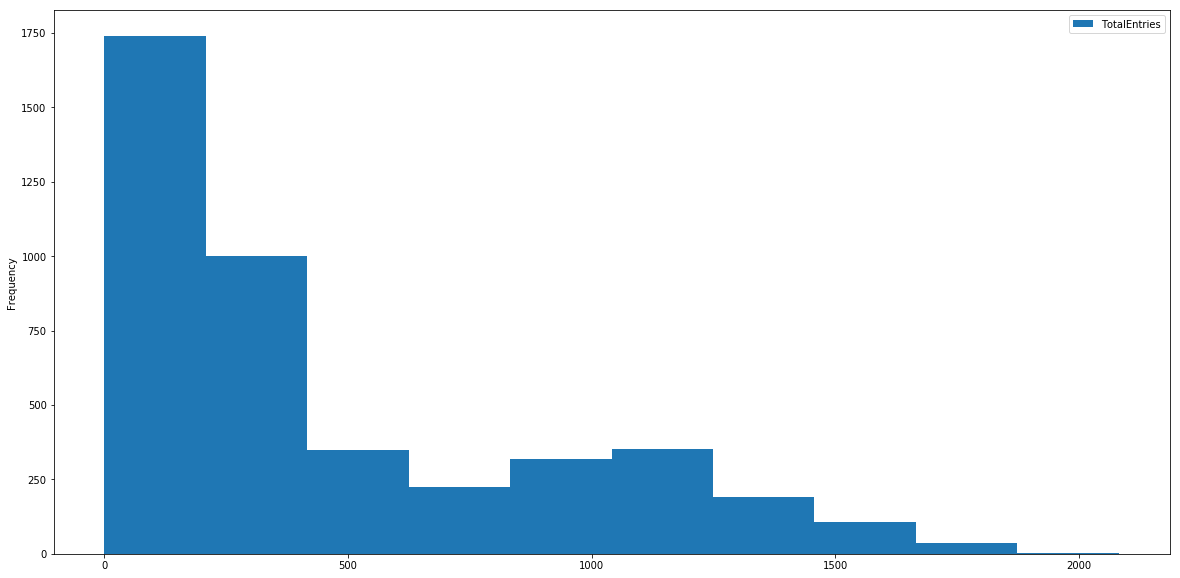

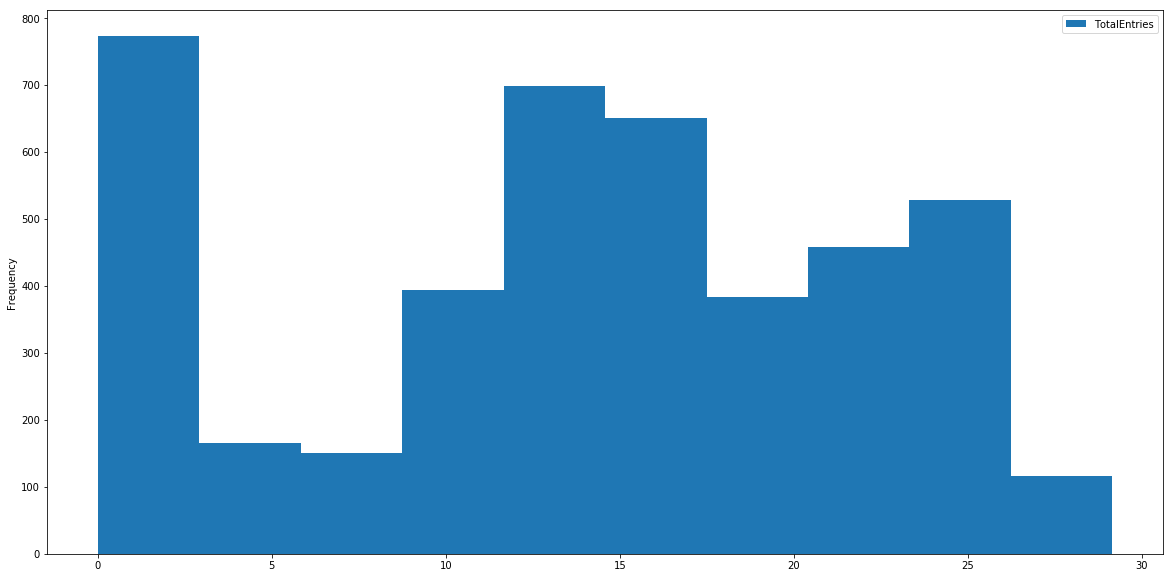

In [82]:
ravn_df.plot(kind='hist'), trans_ravn_df.plot(kind='hist')

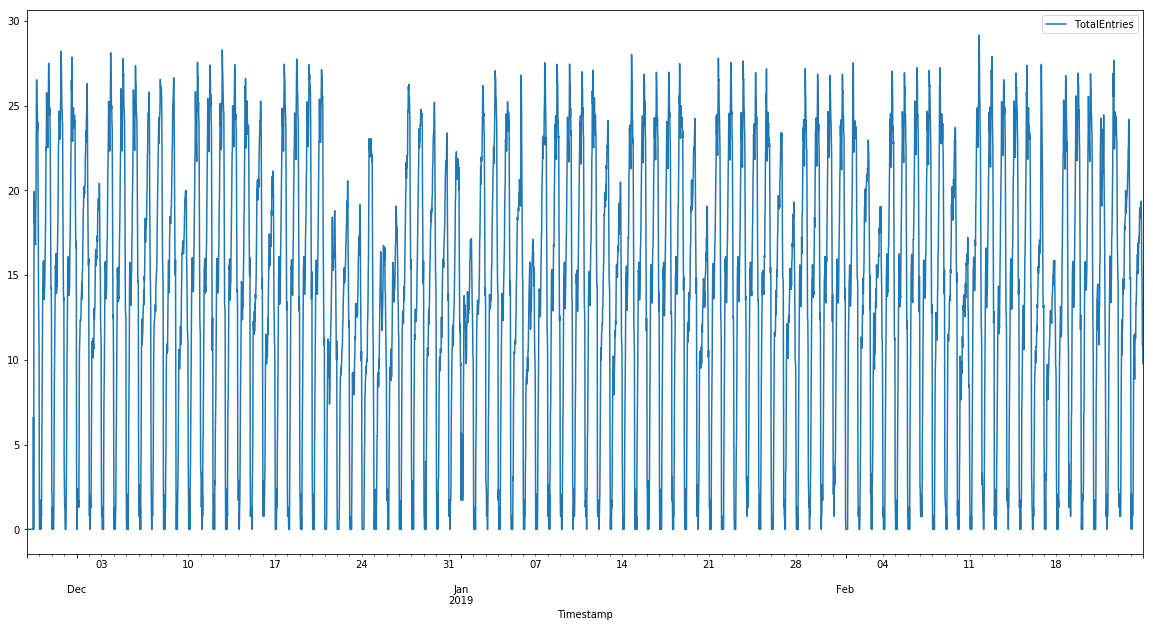

In [88]:
trans_ravn_df.plot()

In [117]:
trans_jaume_df = jaume_df.copy()
for x in tqdm(range(len(jaume_df))):
    trans_jaume_df['TotalEntries'][x:(x+1)] = trans_jaume_df['TotalEntries'][x:(x+1)] + c 

trans_jaume_df['TotalEntries'], lam_jaume = boxcox(trans_jaume_df['TotalEntries'])
lam_jaume

100%|██████████| 3552/3552 [00:02<00:00, 1398.13it/s]


0.36376370269585795

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe004d90da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe004d0a710>)

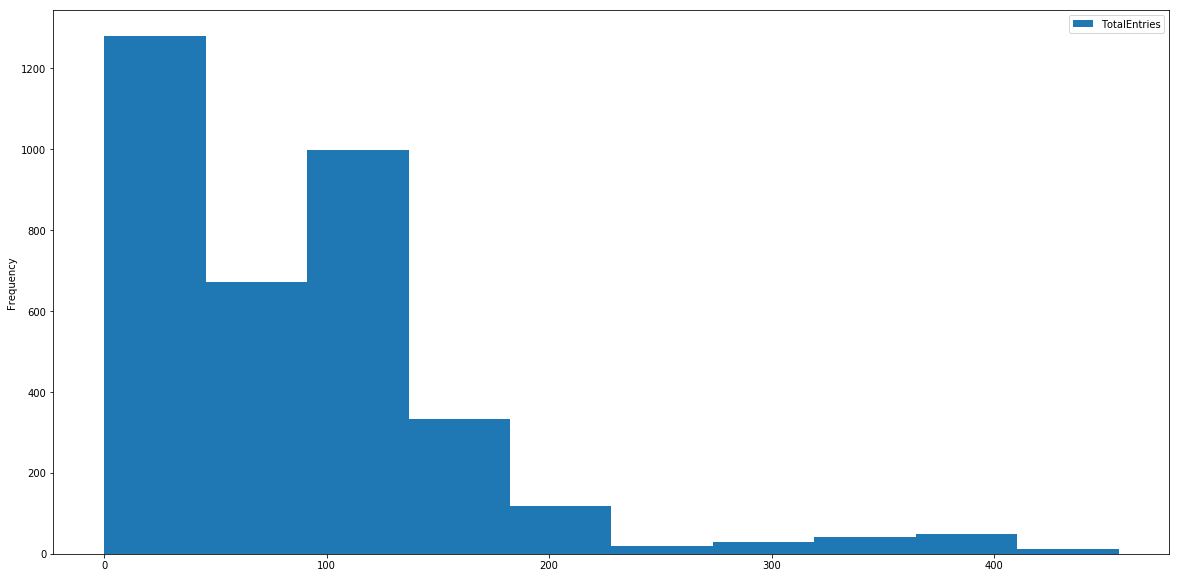

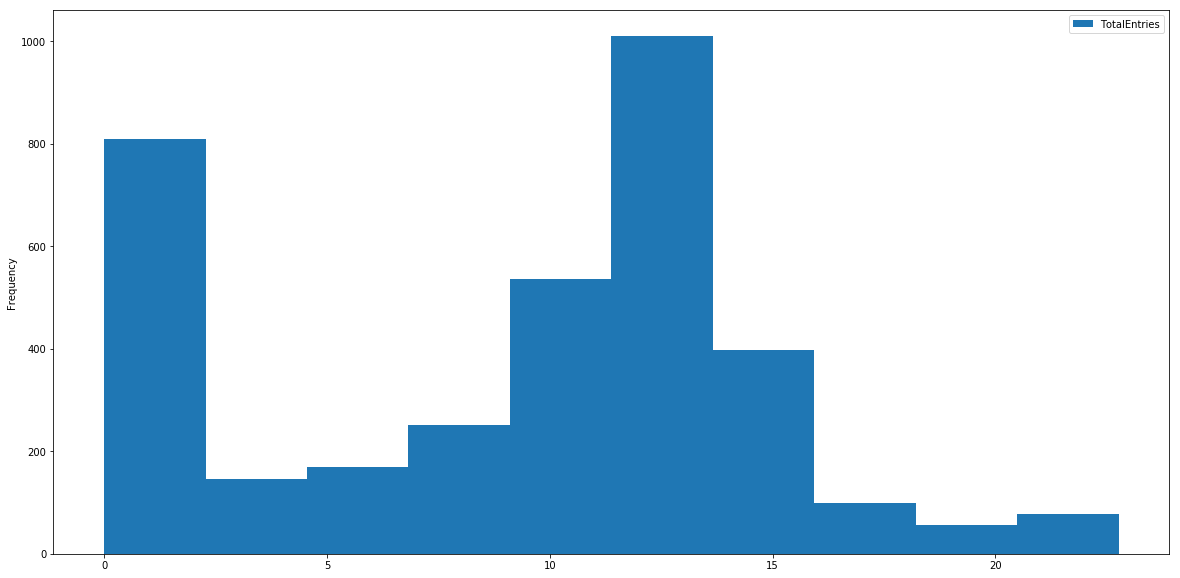

In [84]:
jaume_df.plot(kind='hist'), trans_jaume_df.plot(kind='hist')

In [95]:
jaume_df[10:11], trans_jaume_df[10:11]

(                     TotalEntries
 Timestamp                        
 2018-12-11 05:00:00            14,                      TotalEntries
 Timestamp                        
 2018-12-11 05:00:00      4.613033)

In [119]:
inv_boxcox(trans_jaume_df[10:11], lam_jaume) - 1

,TotalEntries
Timestamp,
2018-12-11 05:00:00,14.0
